### Team ID   <font color=black>        : C7</font>
### Sem         : <font color=black> 5</font> 
### Div           : <font color=black> C</font>
### School: <font color=black>School Of Computer Science And Engineering </font> 
###   Topic ID   : <font color=black> 5DMACP08</font>
###    Project Title:  <font color=black>Building Insurance Claim Prediction</font>
###   Problem Statement: <font color=black>Predict if a building will have an insurance claim during a certain period. </font>   
###    Team Details :
###    Team Leader :
###  <font color=black>Nisha Rao         -146-    01FE17BCS123</font>
###    Members:
###  <font color=black>Prajwal Nazre     -154-    01FE17BCS131</font> 
### <font color=black>Pratiksha Danti    -162-    01FE17BCS139</font>
### <font color=black>Rachana Udagatti   -167-    01FE17BCS145</font>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

### Input data

In [2]:
# Loading the train datasets
train_datax=pd.read_csv('X_train1.csv')
train_datax.drop('Index',axis=1,inplace=True)
train_datax.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109.0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004.0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340.0


### External Data

In [3]:
lat_long=pd.read_csv('/home/ubuntu/Desktop/DMA Project/latlong.csv')
lat_long

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,Insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Attignat,1340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beaupont,1270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bény,1370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Béreyziat,1340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,1250,1245,46.133333,5.4,1.01
5,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bourg-en-Bresse,1000,1053,46.200000,5.216667,1.00
6,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Buellas,1310,1065,46.200000,5.133333,0.73
7,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Certines,1240,1069,46.133333,5.266667,1.97
8,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Ceyzériat,1250,1072,46.166667,5.316667,1.15
9,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Chavannes-sur-Suran,1250,1095,46.266667,5.416667,1.14


In [4]:
train_datax=pd.merge(train_datax,lat_long,on='Insee',how='outer')
train_datax.drop('EU_circo',axis=1,inplace=True)
train_datax.drop('chef.lieu_région',axis=1,inplace=True)
#train_datax.drop('code_région',axis=1,inplace=True)
train_datax.drop('codes_postaux',axis=1,inplace=True)
train_datax.drop('nom_commune',axis=1,inplace=True)
train_datax.drop('nom_département',axis=1,inplace=True)
train_datax.drop('nom_région',axis=1,inplace=True)
train_datax.drop('numéro_circonscription',axis=1,inplace=True)
train_datax.drop('numéro_département',axis=1,inplace=True)
train_datax.drop('préfecture',axis=1,inplace=True)
train_datax.drop('éloignement',axis=1,inplace=True)
train_datax.drop('latitude',axis=1,inplace=True)
train_datax.drop('longitude',axis=1,inplace=True)
train_datax.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,code_région
0,18702.0,2014.0,1.0,0.0,V,NOT,1,O,1,O,...,V,based,2.0,1351.0,4.0,2012.0,0,2,65440.0,73.0
1,18702.0,2014.0,1.0,0.0,V,NOT,1,O,1,O,...,V,based,2.0,1351.0,4.0,2012.0,0,2,65440.0,73.0
2,368.0,2012.0,1.0,0.0,V,V,V,V,V,V,...,NOT,based,2.0,580.0,2.0,1980.0,0,0,65440.0,73.0
3,368.0,2012.0,1.0,0.0,V,V,V,V,V,V,...,NOT,based,2.0,580.0,2.0,1980.0,0,0,65440.0,73.0
4,945.0,2013.0,1.0,0.0,V,NOT,1,O,1,O,...,V,based,2.0,2591.0,2.0,1992.0,0,4,65440.0,73.0


In [5]:
train_datax.drop('Insee',axis=1,inplace=True)

In [6]:
train_datay=pd.read_csv('/home/ubuntu/Desktop/DMA Project/dataset/Y_train.csv')
train_datay.drop('Index',axis=1,inplace=True)
train_datay.head()

,Identifiant,target
0,18702,0
1,3877,1
2,4942,0
3,13428,0
4,17137,0


In [7]:
train_data=pd.merge(train_datax,train_datay)
train_data.tail(10)

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région,target
15026,5483.0,2016.0,1.000000,0.0,V,N,1,O,1,O,...,V,base,2.0,550.0,1.0,1975.0,0,1,54.0,0
15027,19182.0,2014.0,0.246575,0.0,V,N,1,O,1,O,...,V,pi,1.0,500.0,1.0,1996.0,0.3,3,82.0,0
15028,17348.0,2014.0,1.000000,0.0,V,N,1,O,1,O,...,V,base,2.0,1350.0,1.0,1750.0,0.6,3,11.0,0
15029,1217.0,2013.0,0.161644,0.0,N,V,V,V,V,V,...,N,base,2.0,650.0,2.0,1980.0,0,0,73.0,0
15030,13967.0,2015.0,1.000000,0.0,N,V,V,V,V,V,...,N,base,2.0,900.0,2.0,1960.0,0,0,25.0,0
15031,15156.0,2015.0,1.000000,0.0,N,V,V,V,V,V,...,N,base,2.0,3200.0,3.0,1980.0,0,0,31.0,1
15032,7744.0,2015.0,1.000000,1.0,V,N,1,O,1,O,...,V,base,2.0,337.0,1.0,1900.0,0.6,2,72.0,0
15033,12530.0,2014.0,1.000000,0.0,N,V,V,V,V,V,...,N,base,2.0,1600.0,2.0,1960.0,0,0,82.0,0
15034,1605.0,2016.0,0.997268,0.0,V,N,1,O,1,O,...,V,effpi,2.0,2417.0,1.0,1993.0,0,4,82.0,0
15035,16868.0,2014.0,0.000000,1.0,V,N,2,O,1,O,...,V,base,2.0,5580.0,2.0,2008.0,0,4,11.0,0


In [8]:
train_data=train_data.drop_duplicates()
train_data.shape[0]

10229

In [9]:
train_data.columns

Index(['Identifiant', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ',
       'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'code_région', 'target'],
      dtype='object')

### Test Data

In [10]:
# Loading the test dataset
test_data=pd.read_csv('/home/ubuntu/Desktop/DMA Project/dataset/X_test1.csv')
test_data1=pd.read_csv('/home/ubuntu/Desktop/DMA Project/dataset/X_test1.csv')
test_data.drop('Index',axis=1,inplace=True)
test_data.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,16872,2012,1.000000,1,V,N,1,O,1,O,...,IDENTIQUE,V,effpi,2,2682.0,2,1970.0,0,4,78383.0
1,16852,2012,1.000000,1,V,N,1,O,1,O,...,IDENTIQUE,V,base,2,2925.0,2,1960.0,0,6,78242.0
2,598,2014,1.000000,1,V,V,V,V,V,V,...,V,N,base,2,525.0,4,1960.0,0,0,75120.0
3,4516,2013,0.161644,0,N,V,V,V,V,V,...,V,N,base,2,443.0,2,1980.0,0,0,11901.0
4,7939,2013,1.000000,0,N,V,V,V,V,V,...,V,N,base,2,1070.0,1,NaN,0,0,42330.0


In [11]:
test_data=pd.merge(test_data,lat_long,on='Insee',how='outer')
test_data.drop('EU_circo',axis=1,inplace=True)
test_data.drop('chef.lieu_région',axis=1,inplace=True)
#test_data.drop('code_région',axis=1,inplace=True)
test_data.drop('codes_postaux',axis=1,inplace=True)
test_data.drop('nom_commune',axis=1,inplace=True)
test_data.drop('nom_département',axis=1,inplace=True)
test_data.drop('nom_région',axis=1,inplace=True)
test_data.drop('numéro_circonscription',axis=1,inplace=True)
test_data.drop('numéro_département',axis=1,inplace=True)
test_data.drop('préfecture',axis=1,inplace=True)
test_data.drop('éloignement',axis=1,inplace=True)
test_data.drop('latitude',axis=1,inplace=True)
test_data.drop('longitude',axis=1,inplace=True)
test_data.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,code_région
0,16872.0,2012.0,1.000000,1.0,V,N,1,O,1,O,...,V,effpi,2.0,2682.0,2.0,1970.0,0,4,78383.0,11.0
1,9309.0,2014.0,0.413699,1.0,N,V,V,V,V,V,...,N,base,2.0,2284.0,2.0,NaN,0,0,78383.0,11.0
2,17432.0,2013.0,0.495890,1.0,V,N,2,O,1,O,...,V,effpi,2.0,2875.0,2.0,1970.0,0,7,78383.0,11.0
3,16852.0,2012.0,1.000000,1.0,V,N,1,O,1,O,...,V,base,2.0,2925.0,2.0,1960.0,0,6,78242.0,11.0
4,16870.0,2013.0,0.000000,1.0,V,N,1,O,1,O,...,V,base,2.0,7232.0,2.0,1970.0,0,5,78242.0,11.0


As we have used External data using Insee,Insee would be redundant thus we have deleted Insee 

In [12]:
test_data.drop('Insee',axis=1,inplace=True)

In [13]:
test_data=test_data.drop_duplicates()
test_data.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région
0,16872.0,2012.0,1.000000,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,effpi,2.0,2682.0,2.0,1970.0,0,4,11.0
1,9309.0,2014.0,0.413699,1.0,N,V,V,V,V,V,...,V,N,base,2.0,2284.0,2.0,NaN,0,0,11.0
2,17432.0,2013.0,0.495890,1.0,V,N,2,O,1,O,...,IDENTIQUE,V,effpi,2.0,2875.0,2.0,1970.0,0,7,11.0
3,16852.0,2012.0,1.000000,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,base,2.0,2925.0,2.0,1960.0,0,6,11.0
4,16870.0,2013.0,0.000000,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,base,2.0,7232.0,2.0,1970.0,0,5,11.0


In [14]:
test_data=test_data[0:3412]
test_data

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région
0,16872.0,2012.0,1.000000,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,effpi,2.0,2682.0,2.0,1970.0,0,4,11.0
1,9309.0,2014.0,0.413699,1.0,N,V,V,V,V,V,...,V,N,base,2.0,2284.0,2.0,NaN,0,0,11.0
2,17432.0,2013.0,0.495890,1.0,V,N,2,O,1,O,...,IDENTIQUE,V,effpi,2.0,2875.0,2.0,1970.0,0,7,11.0
3,16852.0,2012.0,1.000000,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,base,2.0,2925.0,2.0,1960.0,0,6,11.0
4,16870.0,2013.0,0.000000,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,base,2.0,7232.0,2.0,1970.0,0,5,11.0
5,17189.0,2016.0,0.994536,1.0,V,N,1,O,1,O,...,IDENTIQUE,V,effpi,2.0,3145.0,2.0,2011.0,0,1,11.0
6,598.0,2014.0,1.000000,1.0,V,V,V,V,V,V,...,V,N,base,2.0,525.0,4.0,1960.0,0,0,NaN
7,9316.0,2014.0,1.000000,1.0,N,V,V,V,V,V,...,V,N,base,2.0,350.0,4.0,NaN,0,0,NaN
8,5780.0,2012.0,1.000000,1.0,V,N,3,O,1,O,...,IDENTIQUE,V,pi,2.0,800.0,4.0,2011.0,0,3,NaN
9,12193.0,2014.0,1.000000,1.0,N,V,V,V,V,V,...,V,N,base,2.0,3935.0,4.0,1980.0,0,0,NaN


In [15]:
test_login=test_data['Identifiant']

### Size of dataset

In [16]:
print("Total size of train data:",train_data.shape[0])
print("Total size of test data:",test_data.shape[0])
print("Total size of dataset:",train_data.shape[0]+test_data.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


### Percentage of missing data

In [17]:
nan_data=(train_data.isnull().sum())
nan_data

Identifiant       0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
code_région    1770
target            0
dtype: int64

In [18]:
targ=train_data['target']

In [19]:
nan_data=(train_data.isnull().sum()/train_data.shape[0])*100
nan_data

Identifiant     0.000000
ft_2_categ      0.000000
EXPO            0.000000
ft_4_categ      0.000000
ft_5_categ      0.000000
ft_6_categ      0.000000
ft_7_categ      0.000000
ft_8_categ      0.000000
ft_9_categ      0.000000
ft_10_categ     0.000000
ft_11_categ     0.000000
ft_12_categ     0.000000
ft_13_categ     0.000000
ft_14_categ     0.000000
ft_15_categ     0.000000
ft_16_categ     0.000000
ft_17_categ     0.000000
ft_18_categ     0.000000
ft_19_categ     0.000000
superficief     1.163359
ft_21_categ     0.000000
ft_22_categ    12.083293
ft_23_categ     0.000000
ft_24_categ     0.000000
code_région    17.303744
target          0.000000
dtype: float64

In [20]:
nan_data[nan_data>0]

superficief     1.163359
ft_22_categ    12.083293
code_région    17.303744
dtype: float64

### box Plots to find outliers

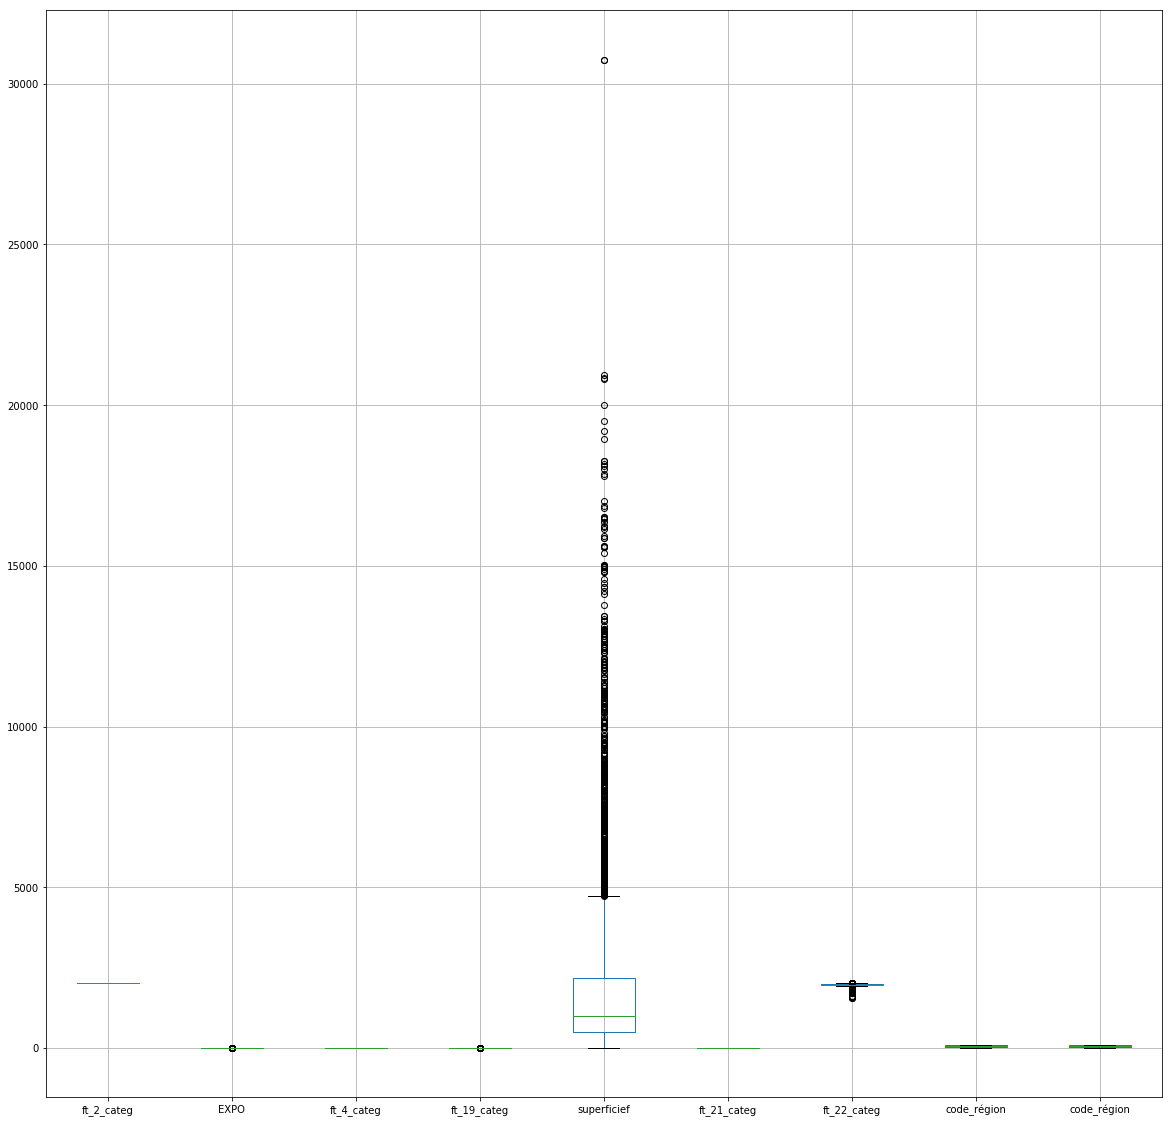

In [21]:
f, ax = plt.subplots(figsize=(20, 20))
train_data.boxplot(['ft_2_categ', 'EXPO', 'ft_4_categ','ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ','code_région','code_région'])
plt.show()

In [22]:
test_nan=(test_data.isnull().sum()/test_data.shape[0])*100
test_nan[['superficief','ft_22_categ','code_région']]

superficief     1.230950
ft_22_categ    11.781946
code_région    17.321219
dtype: float64


### Statistical analysis of superficief attribute with value > 100 and < 15000

In [23]:
## superficief
train_data['superficief'].describe()

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

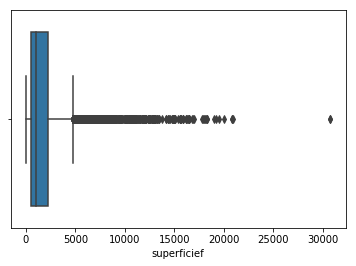

In [24]:
sns.boxplot(x=train_data['superficief'])

There are some outliers in superficief

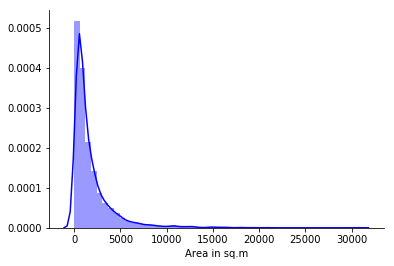

In [25]:
sns.distplot(train_data.superficief.dropna(),color='blue')
plt.xlabel('Area in sq.m')
sns.despine()

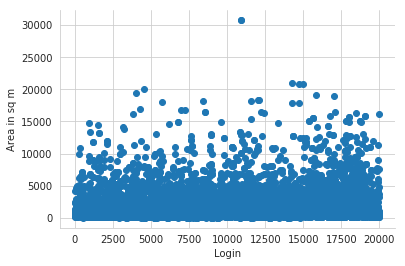

In [26]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['Identifiant']
y=train_data['superficief']
plt.xlabel('Login')
plt.ylabel('Area in sq m')
plt.scatter(x,y)
sns.despine()

The Maximum users has area between range of 100 to 15000

In [27]:
train_data[train_data.superficief>100]['superficief'].describe()

count    10021.000000
mean      1833.829358
std       2276.052092
min        104.000000
25%        518.000000
50%       1022.000000
75%       2200.000000
max      30745.000000
Name: superficief, dtype: float64

In [28]:
train_data[train_data.superficief<15000]['superficief'].describe()

count    10068.000000
mean      1752.146206
std       2021.729641
min          1.000000
25%        500.000000
50%       1000.000000
75%       2161.500000
max      14950.000000
Name: superficief, dtype: float64

In [29]:
train_data.loc[train_data.superficief>15000]=np.nan
train_data.loc[train_data.superficief<100]=np.nan
train_data.superficief.describe()

count    10005.000000
mean      1768.924138
std       2040.424244
min        100.000000
25%        510.000000
50%       1010.000000
75%       2184.000000
max      15000.000000
Name: superficief, dtype: float64

### Statistical analysis of ft_22_categ attribute with value > 1850 and < 2012

In [30]:
train_data.ft_22_categ.describe()

count    8910.000000
mean     1964.968350
std        33.640982
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

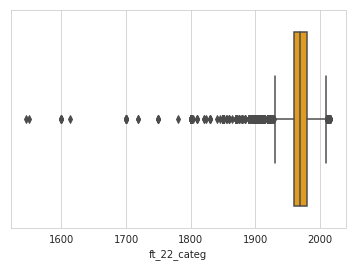

In [31]:
sns.boxplot(x=train_data['ft_22_categ'],color='orange')

boxplot shows that the ft_22_categ contain some outliers

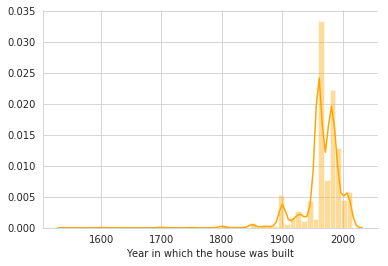

In [32]:
sns.distplot(train_data.ft_22_categ.dropna(),color='orange')
plt.xlabel('Year in which the house was built')
sns.despine()

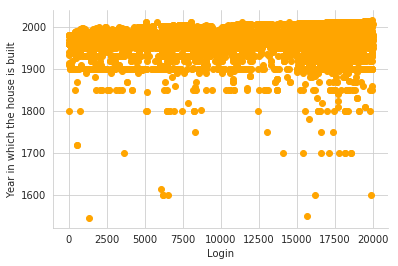

In [33]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['Identifiant']
y=train_data['ft_22_categ']
plt.xlabel('Login')
plt.ylabel('Year in which the house is built')
plt.scatter(x,y,color='orange')
sns.despine()

In [34]:
train_data[train_data.ft_22_categ>1850]['ft_22_categ'].describe()

count    8781.000000
mean     1967.354629
std        26.096286
min      1854.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [35]:
train_data[train_data.ft_22_categ<2012]['ft_22_categ'].describe()

count    8812.000000
mean     1964.438153
std        33.447434
min      1545.000000
25%      1960.000000
50%      1967.000000
75%      1980.000000
max      2011.000000
Name: ft_22_categ, dtype: float64

In [36]:
train_data.loc[train_data.ft_22_categ>2012]=np.nan
train_data.loc[train_data.ft_22_categ<1850]=np.nan
train_data.ft_22_categ.describe()

count    8808.000000
mean     1966.344005
std        27.681844
min      1850.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2012.000000
Name: ft_22_categ, dtype: float64

In [37]:
train_data.code_région.describe()

count    8282.000000
mean       61.073774
std        31.405544
min        11.000000
25%        31.000000
50%        73.000000
75%        91.000000
max        94.000000
Name: code_région, dtype: float64

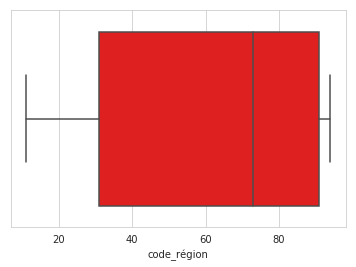

In [38]:
sns.boxplot(x=train_data['code_région'],color='red')

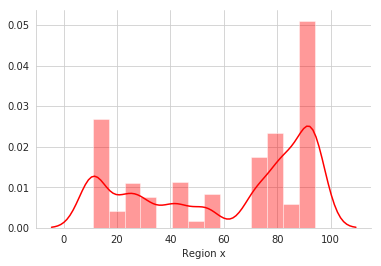

In [39]:
sns.distplot(train_data.code_région.dropna(),color='red')
plt.xlabel('Region x')
sns.despine()

### Data Visualization

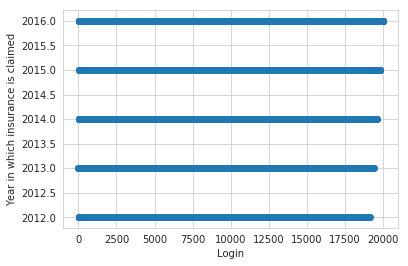

In [40]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['Identifiant']
y=train_data['ft_2_categ']
plt.xlabel('Login')
plt.ylabel('Year in which insurance is claimed')
plt.scatter(x,y)

There no missing data and outliers in the ft_2_categ 

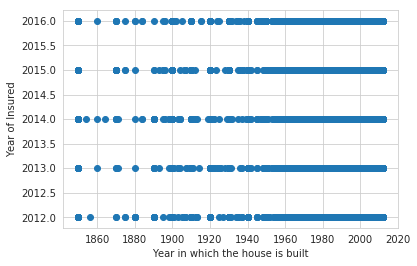

In [41]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
y=train_data['ft_2_categ']
x=train_data['ft_22_categ']
plt.xlabel('Year in which the house is built')
plt.ylabel('Year of Insured')
plt.scatter(x,y)


 from graph we infer that All house in our train Dataset has Claimed insurace between 2012-2016

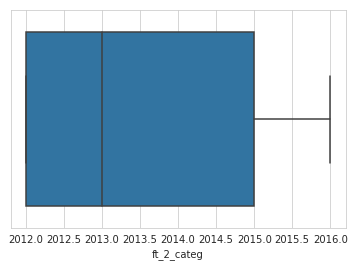

In [42]:
sns.boxplot(x=train_data['ft_2_categ'])

There is no outliers in ft_2_categ

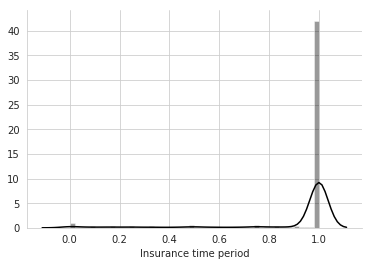

In [43]:
sns.distplot(train_data.EXPO.dropna(),color='black')
plt.xlabel('Insurance time period')
sns.despine()

Maximum number of users has claimed their insurance in the period of 1 year

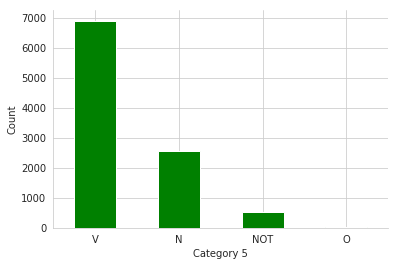

In [44]:
train_data.ft_5_categ.value_counts(dropna=True).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 5')
plt.ylabel('Count')
sns.despine()

ft_5_categ has the highest frequency of V

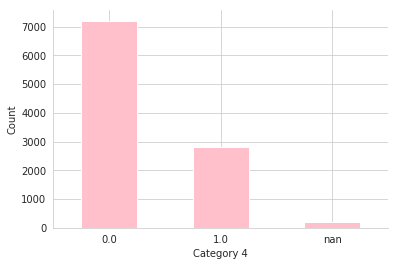

In [45]:
train_data.ft_4_categ.value_counts(dropna=False).plot(kind='bar',color='pink',rot=0)
plt.xlabel('Category 4')
plt.ylabel('Count')
sns.despine()

ft_4_categ has the highest frequency of class 0

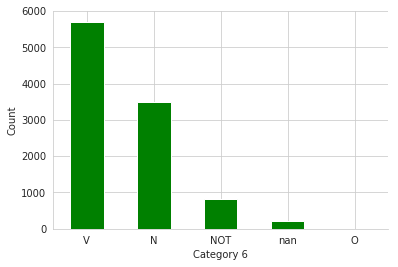

In [46]:
train_data.ft_6_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 6')
plt.ylabel('Count')
sns.despine()

ft_6_categ is a categorical feature with the highest frequency of class V

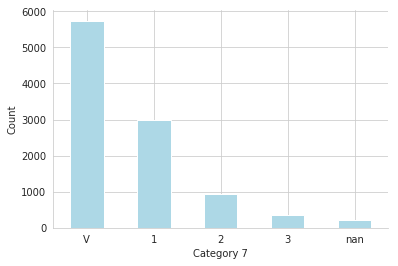

In [47]:
train_data.ft_7_categ.value_counts(dropna=False).plot(kind='bar',color='lightblue',rot=0)
plt.xlabel('Category 7')
plt.ylabel('Count')
sns.despine()

ft_7_categ is a categorical feature with the highest frequency of class V

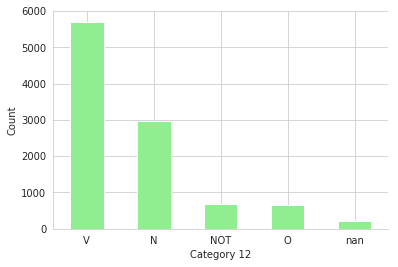

In [48]:
train_data.ft_12_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 12')
plt.ylabel('Count')
sns.despine()


ft_12_categ is a categorical feature with the highest frequency of class V

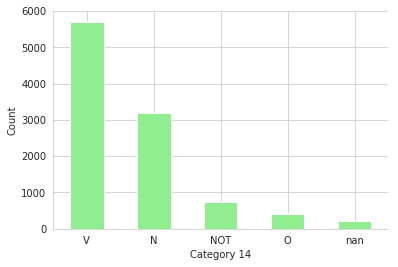

In [49]:
train_data.ft_14_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 14')
plt.ylabel('Count')
sns.despine()

ft_14_categ is a categorical feature with the highest frequency of class V

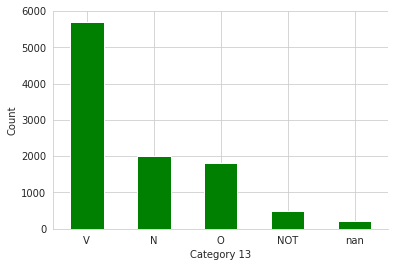

In [50]:
train_data.ft_13_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 13')
plt.ylabel('Count')
sns.despine()


ft_13_categ is a categorical feature with the highest frequency of class V

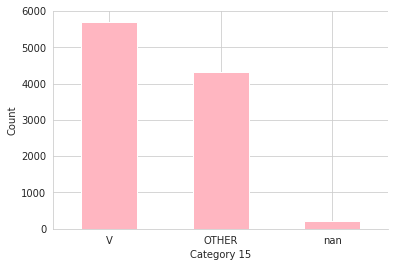

In [51]:
train_data.ft_15_categ.replace('AUTRE','OTHER',inplace=True)
train_data.ft_15_categ
train_data.ft_15_categ.value_counts(dropna=False).plot(kind='bar',color='lightpink',rot=0)
plt.xlabel('Category 15')
plt.ylabel('Count')
sns.despine()
plt.show()

ft_15_categ is a categorical feature with the highest frequency of class V

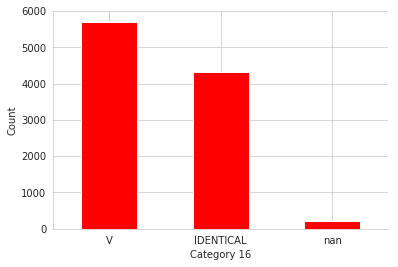

In [52]:
train_data.ft_16_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_16_categ.value_counts(dropna=False).plot(kind='bar',color='red',rot=0)
plt.xlabel('Category 16')
plt.ylabel('Count')
sns.despine()

ft_16_categ is a categorical feature with the highest frequency of class V

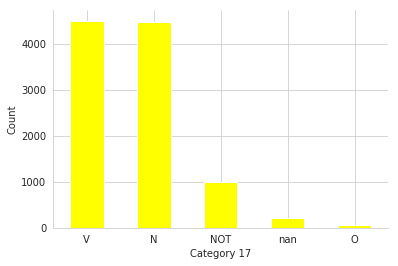

In [53]:
train_data.ft_17_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_17_categ.value_counts(dropna=False).plot(kind='bar',color='yellow',rot=0)
plt.xlabel('Category 17')
plt.ylabel('Count')
sns.despine()

ft_17_categ is a categorical feature with the highest frequency of class NOT

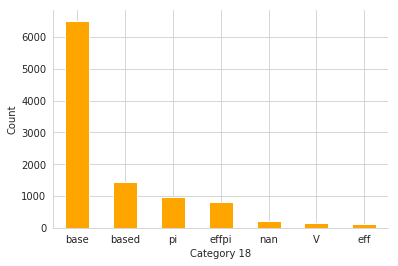

In [54]:
train_data.ft_18_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_18_categ.value_counts(dropna=False).plot(kind='bar',color='orange',rot=0)
plt.xlabel('Category 18')
plt.ylabel('Count')
sns.despine()

ft_18_categ is a categorical feature with the highest frequency of class base

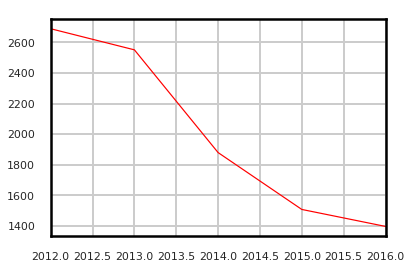

In [55]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=0.5)
train_data.ft_2_categ.value_counts().plot(kind='line', linewidth=1.2, color='red')


From the above line graph, we infer that the number of houses insured has a drastic decrease from 2012 to 2016

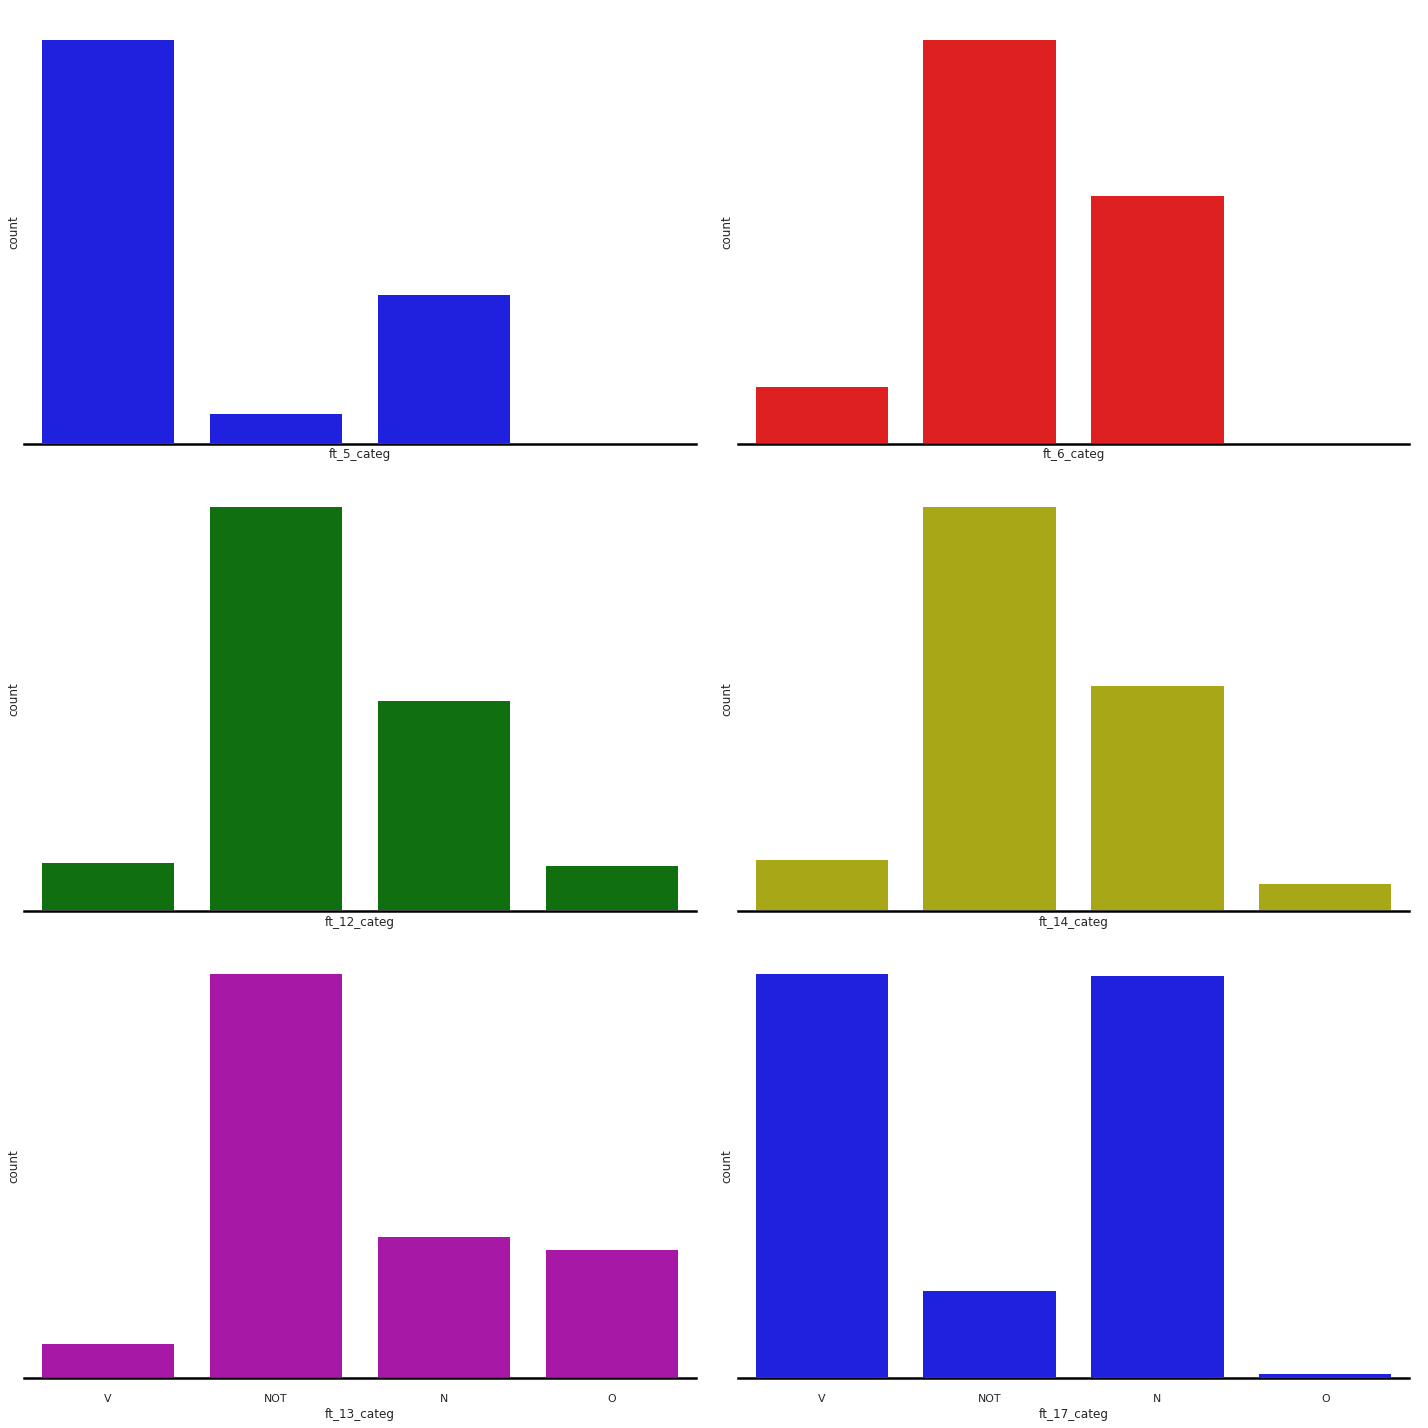

In [56]:
f,a=plt.subplots(3,2,figsize=(20,20),sharex=True)
sns.despine(left=True)
sns.countplot(x="ft_5_categ",data=train_data,color="b",ax=a[0,0])
sns.countplot(x="ft_6_categ",data=train_data,color="r",ax=a[0,1])
sns.countplot(x="ft_12_categ",data=train_data,color="g",ax=a[1,0])
sns.countplot(x="ft_14_categ",data=train_data,color="y",ax=a[1,1])
sns.countplot(x="ft_13_categ",data=train_data,color="m",ax=a[2,0])
sns.countplot(x="ft_17_categ",data=train_data,color="b",ax=a[2,1])
plt.setp(a,yticks=[])
plt.tight_layout()

This is a comparative study of the features having the same classes namely V,NOT,O

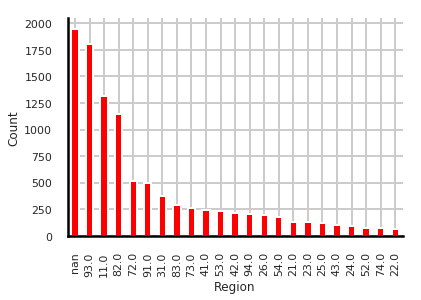

In [57]:
train_data.code_région.value_counts(dropna=False).plot(kind='bar',color='red',rot=90)
plt.xlabel('Region')
plt.ylabel('Count')
sns.despine()

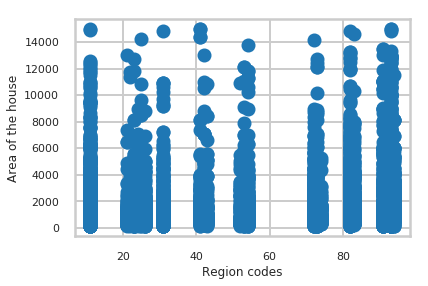

In [58]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['code_région']
y=train_data['superficief']
plt.xlabel('Region codes')
plt.ylabel('Area of the house')
plt.scatter(x,y)


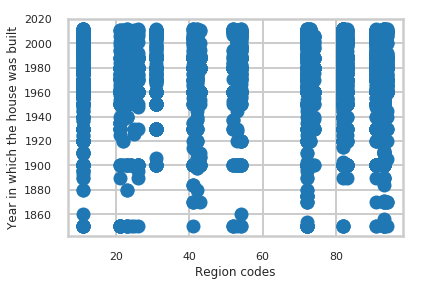

In [59]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['code_région']
y=train_data['ft_22_categ']
plt.xlabel('Region codes')
plt.ylabel('Year in which the house was built')
plt.scatter(x,y)


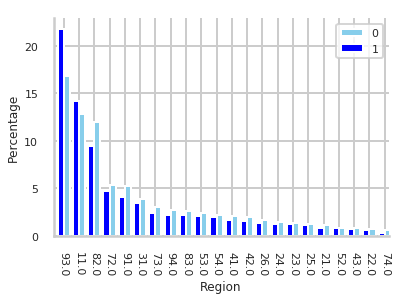

In [60]:
target0 = sum(train_data['target'] == 0)
target1 = sum(train_data['target'] == 1)

target0_region = train_data.loc[train_data['target'] == 0, 'code_région'].value_counts() / target0 * 100
target1_region = train_data.loc[train_data['target'] == 1, 'code_région'].value_counts() / target1 * 100
width = 0.4
target0_region.plot(kind='bar',width=0.4,color='skyblue',rot=0,position=0,label='0')
target1_region.plot(kind='bar',width=0.4,color='blue',rot=270,position=1,label='1')
plt.legend()
plt.xlabel('Region')
plt.ylabel('Percentage')
sns.despine()
plt.show()

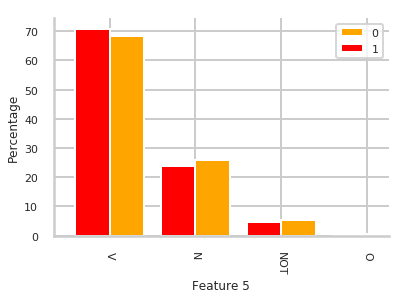

In [61]:
target0 = sum(train_data['target'] == 0)
target1 = sum(train_data['target'] == 1)

target0_region = train_data.loc[train_data['target'] == 0, 'ft_5_categ'].value_counts() / target0 * 100
target1_region = train_data.loc[train_data['target'] == 1, 'ft_5_categ'].value_counts() / target1 * 100
width = 0.4
target0_region.plot(kind='bar',width=0.4,color='orange',rot=0,position=0,label='0')
target1_region.plot(kind='bar',width=0.4,color='red',rot=270,position=1,label='1')
plt.legend()
plt.xlabel('Feature 5')
plt.ylabel('Percentage')
sns.despine()
plt.show()

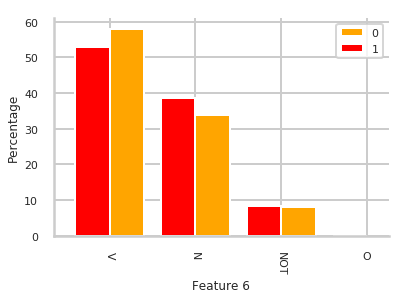

In [62]:
target0 = sum(train_data['target'] == 0)
target1 = sum(train_data['target'] == 1)

target0_region = train_data.loc[train_data['target'] == 0, 'ft_6_categ'].value_counts() / target0 * 100
target1_region = train_data.loc[train_data['target'] == 1, 'ft_6_categ'].value_counts() / target1 * 100
width = 0.4
target0_region.plot(kind='bar',width=0.4,color='orange',rot=0,position=0,label='0')
target1_region.plot(kind='bar',width=0.4,color='red',rot=270,position=1,label='1')
plt.legend()
plt.xlabel('Feature 6')
plt.ylabel('Percentage')
sns.despine()
plt.show()

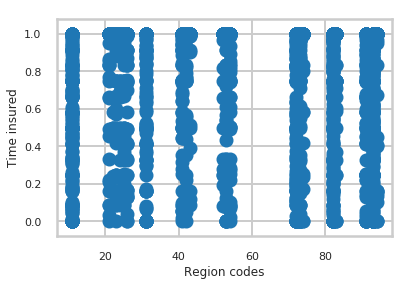

In [63]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['code_région']
y=train_data['EXPO']
plt.xlabel('Region codes')
plt.ylabel('Time insured')
plt.scatter(x,y)


In [64]:
test_login=test_data['Identifiant']
test_login.head()

0    16872.0
1     9309.0
2    17432.0
3    16852.0
4    16870.0
Name: Identifiant, dtype: float64

Storing the login attribute which is further used during the final output creation

In [65]:
train_data['target']=targ

### Removing attribute login as it does not support in the prediction

In [66]:
train_data.drop('Identifiant',axis=1,inplace=True)
test_data.drop('Identifiant',axis=1,inplace=True)
train_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région,target
0,2014.0,1.0,0.0,V,NOT,1,O,1,O,NOT,...,V,based,2.0,1351.0,4.0,2012.0,0,2,73.0,0
2,2012.0,1.0,0.0,V,V,V,V,V,V,V,...,NOT,based,2.0,580.0,2.0,1980.0,0,0,73.0,0
4,2013.0,1.0,0.0,V,NOT,1,O,1,O,NOT,...,V,based,2.0,2591.0,2.0,1992.0,0,4,73.0,0
6,2015.0,0.0,0.0,V,V,V,V,V,V,V,...,NOT,based,2.0,300.0,4.0,NaN,0,0,73.0,0
8,2014.0,1.0,0.0,V,N,1,O,1,O,N,...,V,base,2.0,3060.0,2.0,2003.0,0,4,73.0,0


In [67]:
test_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région
0,2012.0,1.000000,1.0,V,N,1,O,1,O,N,...,IDENTIQUE,V,effpi,2.0,2682.0,2.0,1970.0,0,4,11.0
1,2014.0,0.413699,1.0,N,V,V,V,V,V,V,...,V,N,base,2.0,2284.0,2.0,NaN,0,0,11.0
2,2013.0,0.495890,1.0,V,N,2,O,1,O,N,...,IDENTIQUE,V,effpi,2.0,2875.0,2.0,1970.0,0,7,11.0
3,2012.0,1.000000,1.0,V,N,1,O,1,O,N,...,IDENTIQUE,V,base,2.0,2925.0,2.0,1960.0,0,6,11.0
4,2013.0,0.000000,1.0,V,N,1,O,1,O,N,...,IDENTIQUE,V,base,2.0,7232.0,2.0,1970.0,0,5,11.0


In [68]:
nan_data1=train_data.isnull().sum()
nan_data1

ft_2_categ      207
EXPO            207
ft_4_categ      207
ft_5_categ      207
ft_6_categ      207
ft_7_categ      207
ft_8_categ      207
ft_9_categ      207
ft_10_categ     207
ft_11_categ     207
ft_12_categ     207
ft_13_categ     207
ft_14_categ     207
ft_15_categ     207
ft_16_categ     207
ft_17_categ     207
ft_18_categ     207
ft_19_categ     207
superficief     318
ft_21_categ     207
ft_22_categ    1421
ft_23_categ     207
ft_24_categ     207
code_région    1947
target            0
dtype: int64

# Data Preprocessing

### Data Cleaning

### Filling in Missing values

In [69]:
train_data['superficief']=train_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [70]:
train_data['code_région']=train_data['code_région'].fillna(method='bfill').fillna(0)

In [71]:
train_data['ft_22_categ']=train_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [72]:
train_data['ft_24_categ']=train_data.ft_24_categ.replace('> = 10',10)
train_data['ft_24_categ']=train_data.ft_24_categ.replace('>=10',10)
train_data['ft_24_categ']=train_data['ft_24_categ'].astype('float')
train_data['ft_24_categ']=train_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [73]:
train_data['ft_2_categ']=train_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [74]:
train_data['EXPO']=train_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [75]:
train_data['ft_4_categ']=train_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [76]:
train_data['ft_21_categ']=train_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [77]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.635253,1.373430,2012.0,2012.0,2013.0,2015.0,2016.0
EXPO,10229.0,0.914754,0.230673,0.0,1.0,1.0,1.0,1.0
ft_4_categ,10229.0,0.281601,0.447755,0.0,0.0,0.0,1.0,1.0
ft_19_categ,10022.0,1.939932,0.237624,1.0,2.0,2.0,2.0,2.0
superficief,10229.0,1785.500831,2035.396714,100.0,520.0,1040.0,2205.0,15000.0
ft_21_categ,10229.0,2.237707,0.960135,1.0,2.0,2.0,3.0,4.0
ft_22_categ,10229.0,1966.086714,27.051919,1850.0,1960.0,1969.5,1980.0,2012.0
ft_24_categ,10229.0,1.858979,2.428899,0.0,0.0,0.0,4.0,10.0
code_région,10229.0,60.511878,31.633815,11.0,26.0,73.0,91.0,94.0
target,10229.0,0.227002,0.418914,0.0,0.0,0.0,0.0,1.0


In [78]:
train_data['ft_5_categ']=train_data['ft_5_categ'].fillna(method='bfill').fillna(0)

In [79]:
train_data['ft_6_categ']=train_data['ft_6_categ'].fillna(method='bfill').fillna(0)

In [80]:
train_data['ft_7_categ']=train_data['ft_7_categ'].fillna(method='bfill').fillna(0)

In [81]:
train_data['ft_8_categ']=train_data['ft_8_categ'].fillna(method='bfill').fillna(0)

In [82]:
train_data['ft_9_categ']=train_data['ft_9_categ'].fillna(method='bfill').fillna(0)

In [83]:
train_data['ft_10_categ']=train_data['ft_10_categ'].fillna(method='bfill').fillna(0)

In [84]:
train_data['ft_11_categ']=train_data['ft_11_categ'].fillna(method='bfill').fillna(0)

In [85]:
train_data['ft_12_categ']=train_data['ft_12_categ'].fillna(method='bfill').fillna(0)

In [86]:
train_data['ft_13_categ']=train_data['ft_13_categ'].fillna(method='bfill').fillna(0)

In [87]:
train_data['ft_14_categ']=train_data['ft_14_categ'].fillna(method='bfill').fillna(0)

In [88]:
train_data['ft_15_categ']=train_data['ft_15_categ'].fillna(method='bfill').fillna(0)

In [89]:
train_data['ft_16_categ']=train_data['ft_16_categ'].fillna(method='bfill').fillna(0)

In [90]:
train_data['ft_17_categ']=train_data['ft_17_categ'].fillna(method='bfill').fillna(0)

In [91]:
train_data['ft_18_categ']=train_data['ft_18_categ'].fillna(method='bfill').fillna(0)

In [92]:
train_data['ft_19_categ']=train_data['ft_19_categ'].fillna(method='bfill').fillna(0)

In [93]:
train_data['ft_23_categ']=train_data['ft_23_categ'].fillna(method='bfill').fillna(0)

In [94]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.635253,1.373430,2012.0,2012.0,2013.0,2015.0,2016.0
EXPO,10229.0,0.914754,0.230673,0.0,1.0,1.0,1.0,1.0
ft_4_categ,10229.0,0.281601,0.447755,0.0,0.0,0.0,1.0,1.0
ft_19_categ,10229.0,1.939779,0.237907,1.0,2.0,2.0,2.0,2.0
superficief,10229.0,1785.500831,2035.396714,100.0,520.0,1040.0,2205.0,15000.0
ft_21_categ,10229.0,2.237707,0.960135,1.0,2.0,2.0,3.0,4.0
ft_22_categ,10229.0,1966.086714,27.051919,1850.0,1960.0,1969.5,1980.0,2012.0
ft_24_categ,10229.0,1.858979,2.428899,0.0,0.0,0.0,4.0,10.0
code_région,10229.0,60.511878,31.633815,11.0,26.0,73.0,91.0,94.0
target,10229.0,0.227002,0.418914,0.0,0.0,0.0,0.0,1.0


### Finding correlation between attributes

In [95]:
train=train_data
train.drop('target',axis=1,inplace=True)

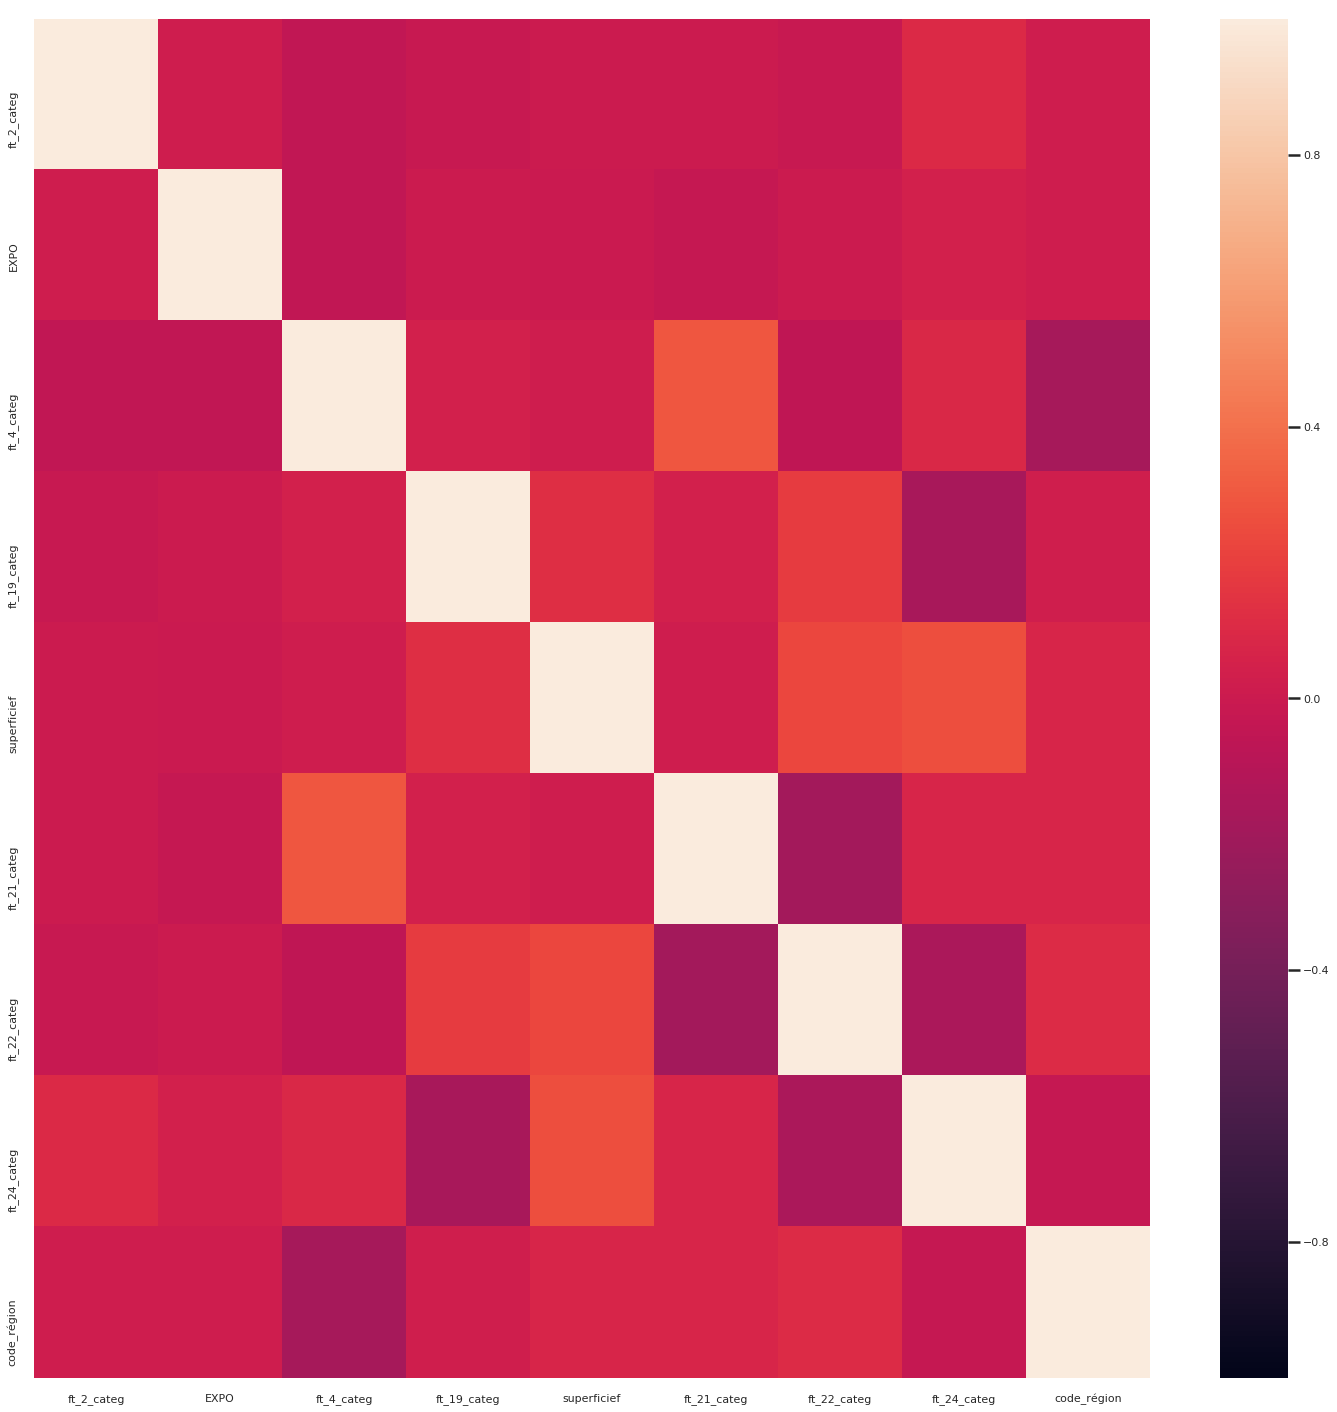

In [96]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1,vmax=1)

In [97]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ft_2_categ,EXPO,ft_4_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_24_categ,code_région
ft_2_categ,1,0.023,-0.049,-0.018,0.0012,0.002,-0.022,0.098,0.018
EXPO,0.023,1,-0.054,0.0011,-0.00097,-0.029,0.0065,0.046,0.019
ft_4_categ,-0.049,-0.054,1,0.042,0.022,0.29,-0.061,0.091,-0.17
ft_19_categ,-0.018,0.0011,0.042,1,0.12,0.041,0.18,-0.16,0.028
superficief,0.0012,-0.00097,0.022,0.12,1,0.018,0.23,0.26,0.076
ft_21_categ,0.002,-0.029,0.29,0.041,0.018,1,-0.19,0.076,0.074
ft_22_categ,-0.022,0.0065,-0.061,0.18,0.23,-0.19,1,-0.15,0.11
ft_24_categ,0.098,0.046,0.091,-0.16,0.26,0.076,-0.15,1,-0.025
code_région,0.018,0.019,-0.17,0.028,0.076,0.074,0.11,-0.025,1


From the heat maps and correlation matrix it is visible that none of the features are positively or negatively 
correlated with each other

### Data Transformation

### Label Encoding Categorical Attributes

In [98]:
from pandas.api.types import CategoricalDtype
def convert_Encoding(df,col):
    df[col],_ =pd.factorize(df[col])
    return df

print("Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_7_categ','ft_8_categ','ft_9_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ','ft_23_categ']

for column in columns_to_convert:
    train_data= convert_Encoding(df=train_data,col=column)
print("Encoding complete...")

Encoding categorical data...
Encoding complete...


In [99]:
train_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région
0,2014.0,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,2.0,1351.0,4.0,2012.0,0,2.0,73.0
2,2012.0,1.0,0.0,0,1,1,1,1,1,1,...,1,1,0,2.0,580.0,2.0,1980.0,0,0.0,73.0
4,2013.0,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,2.0,2591.0,2.0,1992.0,0,4.0,73.0
6,2015.0,0.0,0.0,0,1,1,1,1,1,1,...,1,1,0,2.0,300.0,4.0,1997.5,0,0.0,73.0
8,2014.0,1.0,0.0,0,2,0,0,0,0,2,...,0,0,1,2.0,3060.0,2.0,2003.0,0,4.0,73.0


In [100]:
train_data['target']=targ
train_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ', 'ft_6_categ',
       'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ', 'ft_11_categ',
       'ft_12_categ', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ', 'ft_19_categ',
       'superficief', 'ft_21_categ', 'ft_22_categ', 'ft_23_categ',
       'ft_24_categ', 'code_région', 'target'],
      dtype='object')

In [101]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.635253,1.373430,2012.0,2012.0,2013.0,2015.0,2016.0
EXPO,10229.0,0.914754,0.230673,0.0,1.0,1.0,1.0,1.0
ft_4_categ,10229.0,0.281601,0.447755,0.0,0.0,0.0,1.0,1.0
ft_5_categ,10229.0,0.573272,0.879765,0.0,0.0,0.0,2.0,3.0
ft_6_categ,10229.0,1.268746,0.599359,0.0,1.0,1.0,2.0,3.0
ft_7_categ,10229.0,0.862743,0.715306,0.0,0.0,1.0,1.0,3.0
ft_8_categ,10229.0,0.571024,0.497122,0.0,0.0,1.0,1.0,2.0
ft_9_categ,10229.0,0.570144,0.496657,0.0,0.0,1.0,1.0,3.0
ft_10_categ,10229.0,0.573859,0.503357,0.0,0.0,1.0,1.0,3.0
ft_11_categ,10229.0,1.269430,0.600112,0.0,1.0,1.0,2.0,3.0


### Data Normalization

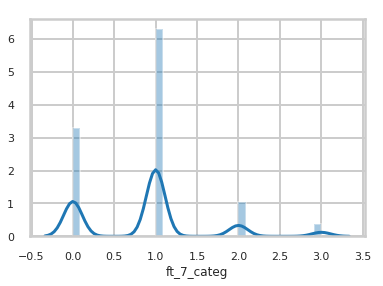

In [102]:
sns.distplot(train['ft_7_categ'])

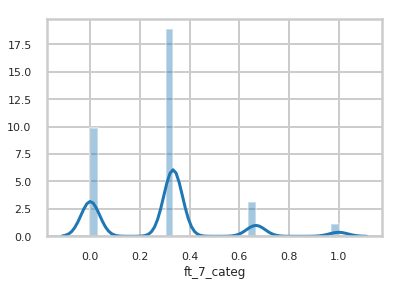

In [103]:
train_data.ft_7_categ=minmax_scaling(train_data['ft_7_categ'],columns=0)
sns.distplot(train_data['ft_7_categ'])

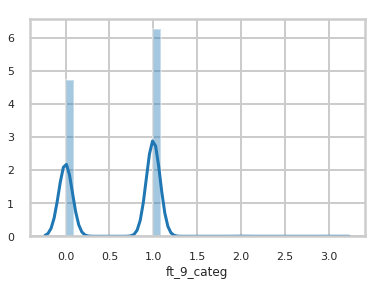

In [104]:
sns.distplot(train['ft_9_categ'])

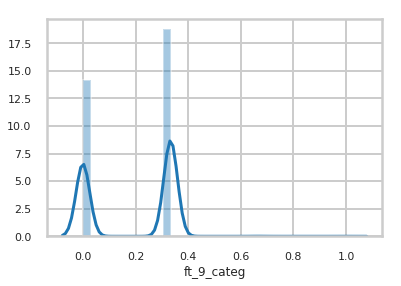

In [105]:
train_data.ft_9_categ=minmax_scaling(train_data['ft_9_categ'],columns=0)
sns.distplot(train['ft_9_categ'])

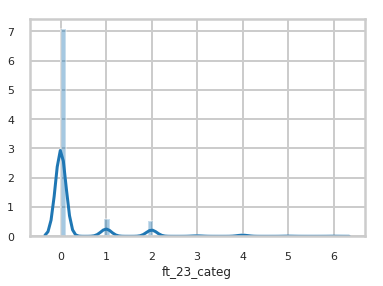

In [106]:
sns.distplot(train['ft_23_categ'])

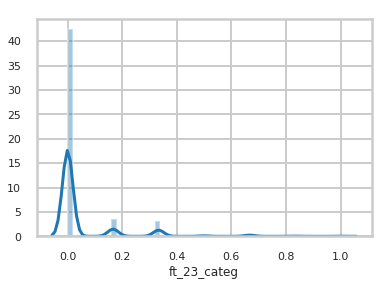

In [107]:
train_data.ft_23_categ=minmax_scaling(train_data['ft_23_categ'],columns=0)
sns.distplot(train['ft_23_categ'])

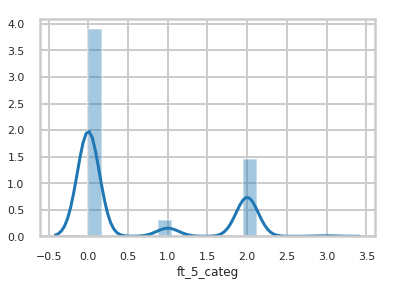

In [108]:
sns.distplot(train['ft_5_categ'])

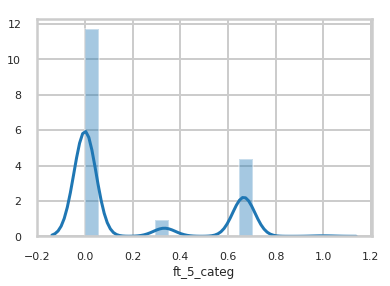

In [109]:
train_data.ft_5_categ=minmax_scaling(train_data['ft_5_categ'],columns=0)
sns.distplot(train['ft_5_categ'])

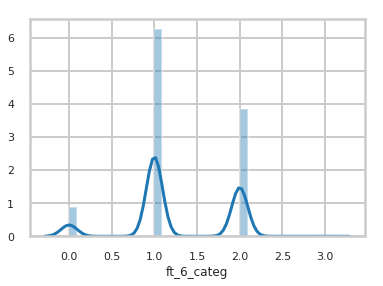

In [110]:
sns.distplot(train['ft_6_categ'])

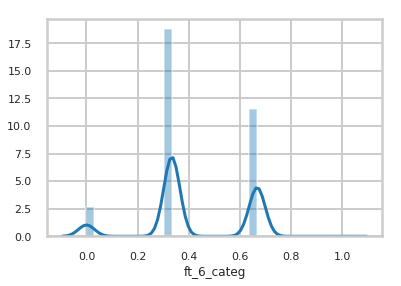

In [111]:
train_data.ft_6_categ=minmax_scaling(train_data['ft_6_categ'],columns=0)
sns.distplot(train['ft_6_categ'])

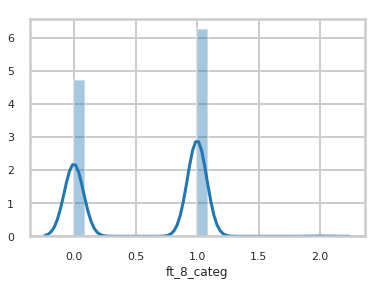

In [112]:
sns.distplot(train['ft_8_categ'])

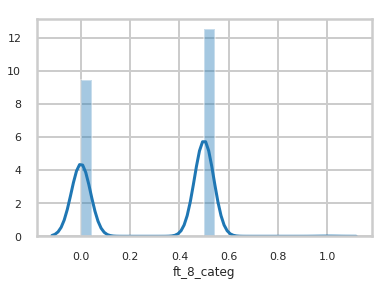

In [113]:
train_data.ft_8_categ=minmax_scaling(train_data['ft_8_categ'],columns=0)
sns.distplot(train['ft_8_categ'])

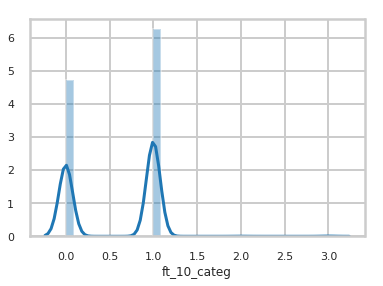

In [114]:
sns.distplot(train['ft_10_categ'])

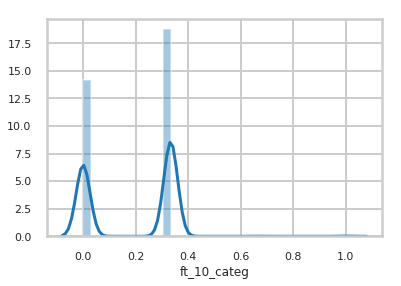

In [115]:
train_data.ft_10_categ=minmax_scaling(train_data['ft_10_categ'],columns=0)
sns.distplot(train['ft_10_categ'])

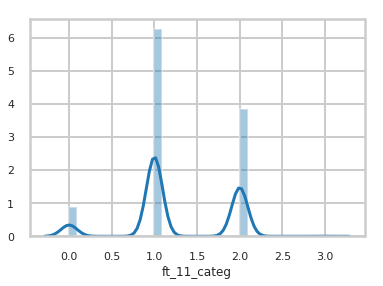

In [116]:
sns.distplot(train['ft_11_categ'])

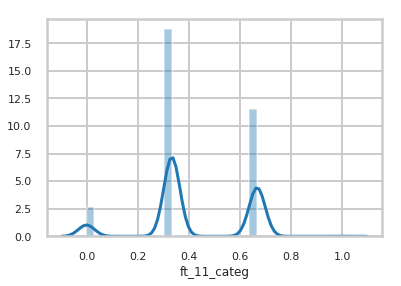

In [117]:
train_data.ft_11_categ=minmax_scaling(train_data['ft_11_categ'],columns=0)
sns.distplot(train['ft_11_categ'])

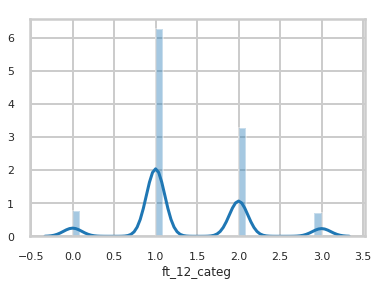

In [118]:
sns.distplot(train['ft_12_categ'])

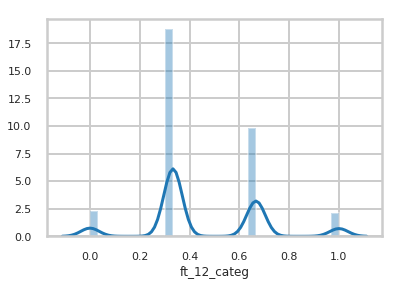

In [119]:
train_data.ft_12_categ=minmax_scaling(train_data['ft_12_categ'],columns=0)
sns.distplot(train['ft_12_categ'])

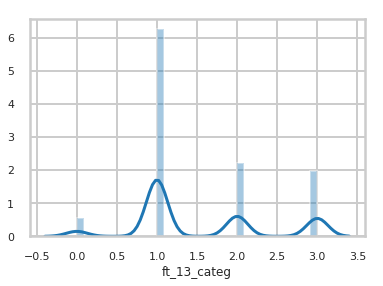

In [120]:
sns.distplot(train['ft_13_categ'])

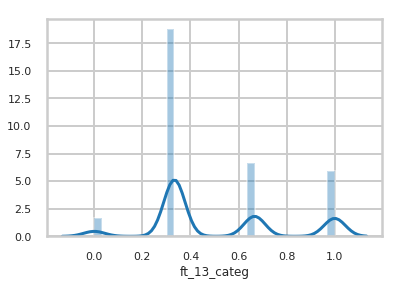

In [121]:
train_data.ft_13_categ=minmax_scaling(train_data['ft_13_categ'],columns=0)
sns.distplot(train['ft_13_categ'])

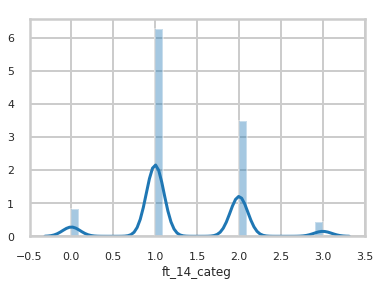

In [122]:
sns.distplot(train['ft_14_categ'])

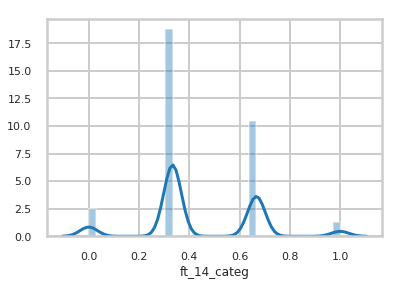

In [123]:
train_data.ft_14_categ=minmax_scaling(train_data['ft_14_categ'],columns=0)
sns.distplot(train['ft_14_categ'])

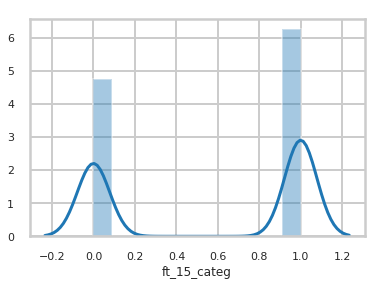

In [124]:
sns.distplot(train['ft_15_categ'])

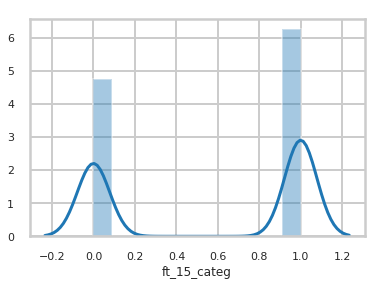

In [125]:
train_data.ft_15_categ=minmax_scaling(train_data['ft_15_categ'],columns=0)
sns.distplot(train['ft_15_categ'])

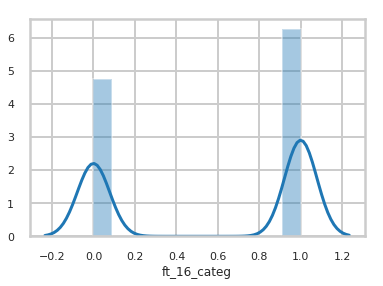

In [126]:
sns.distplot(train['ft_16_categ'])

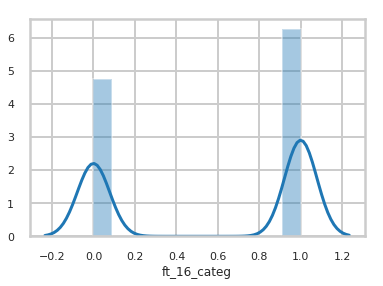

In [127]:
train_data.ft_16_categ=minmax_scaling(train_data['ft_16_categ'],columns=0)
sns.distplot(train['ft_16_categ'])

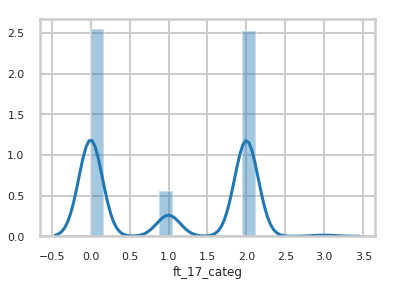

In [128]:
sns.distplot(train['ft_17_categ'])

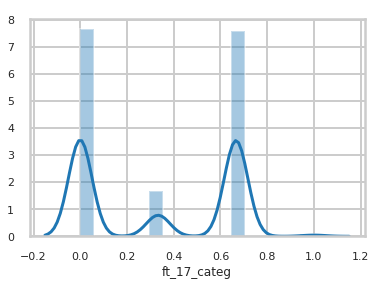

In [129]:
train_data.ft_17_categ=minmax_scaling(train_data['ft_17_categ'],columns=0)
sns.distplot(train['ft_17_categ'])

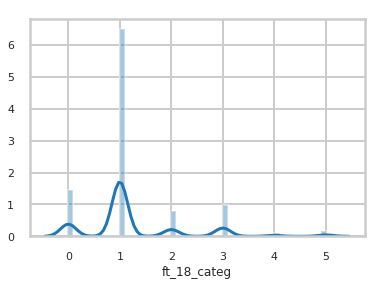

In [130]:
sns.distplot(train['ft_18_categ'])

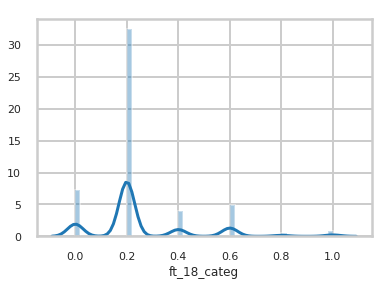

In [131]:
train_data.ft_18_categ=minmax_scaling(train_data['ft_18_categ'],columns=0)
sns.distplot(train['ft_18_categ'])

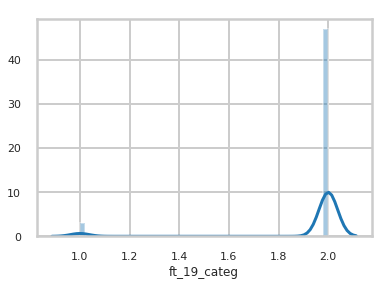

In [132]:
sns.distplot(train['ft_19_categ'])

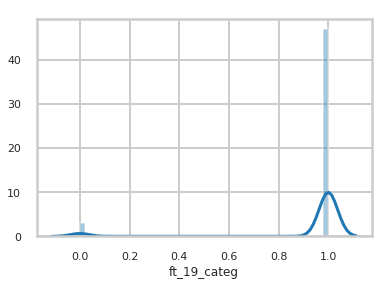

In [133]:
train_data.ft_19_categ=minmax_scaling(train_data['ft_19_categ'],columns=0)
sns.distplot(train['ft_19_categ'])

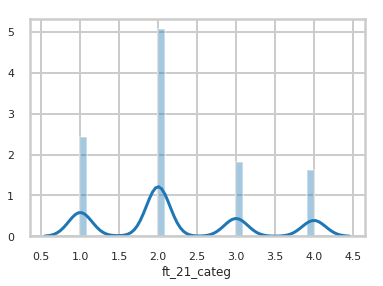

In [134]:
sns.distplot(train['ft_21_categ'])

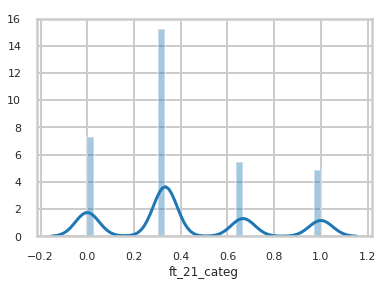

In [135]:
train_data.ft_21_categ=minmax_scaling(train_data['ft_21_categ'],columns=0)
sns.distplot(train['ft_21_categ'])

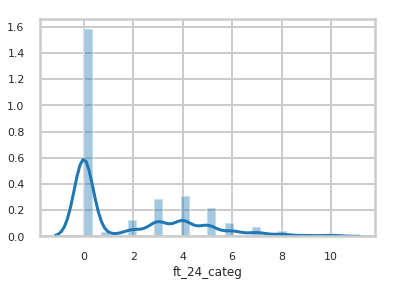

In [136]:
sns.distplot(train['ft_24_categ'])

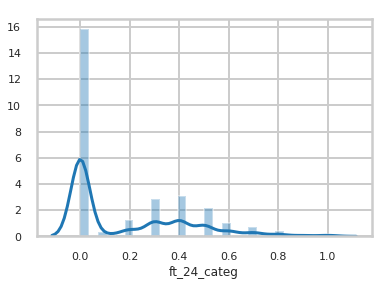

In [137]:
train_data.ft_24_categ=minmax_scaling(train_data['ft_24_categ'],columns=0)
sns.distplot(train['ft_24_categ'])

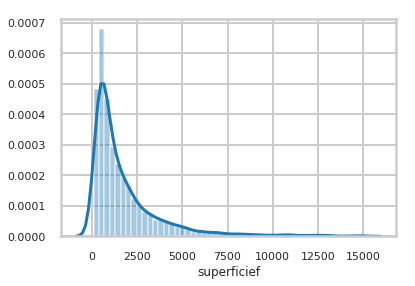

In [138]:
sns.distplot(train['superficief'])

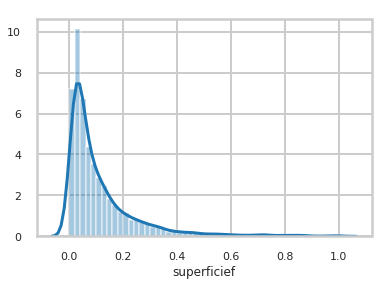

In [139]:
train_data['superficief']=minmax_scaling(train_data['superficief'],columns=0)
sns.distplot(train['superficief'])

In [140]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.635253,1.373430,2012.0,2012.000000,2013.000000,2015.000000,2016.0
EXPO,10229.0,0.914754,0.230673,0.0,1.000000,1.000000,1.000000,1.0
ft_4_categ,10229.0,0.281601,0.447755,0.0,0.000000,0.000000,1.000000,1.0
ft_5_categ,10229.0,0.191091,0.293255,0.0,0.000000,0.000000,0.666667,1.0
ft_6_categ,10229.0,0.422915,0.199786,0.0,0.333333,0.333333,0.666667,1.0
ft_7_categ,10229.0,0.287581,0.238435,0.0,0.000000,0.333333,0.333333,1.0
ft_8_categ,10229.0,0.285512,0.248561,0.0,0.000000,0.500000,0.500000,1.0
ft_9_categ,10229.0,0.190048,0.165552,0.0,0.000000,0.333333,0.333333,1.0
ft_10_categ,10229.0,0.191286,0.167786,0.0,0.000000,0.333333,0.333333,1.0
ft_11_categ,10229.0,0.423143,0.200037,0.0,0.333333,0.333333,0.666667,1.0


In [141]:
train_data.shape[0]

10229

In [142]:
train_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ', 'ft_6_categ',
       'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ', 'ft_11_categ',
       'ft_12_categ', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ', 'ft_19_categ',
       'superficief', 'ft_21_categ', 'ft_22_categ', 'ft_23_categ',
       'ft_24_categ', 'code_région', 'target'],
      dtype='object')

### Test Dataset

In [143]:
test_data.loc[test_data.superficief>15000]=np.nan
test_data.loc[test_data.superficief<100]=np.nan

In [144]:
test_data.loc[test_data.ft_22_categ>2012]=np.nan
test_data.loc[test_data.ft_22_categ<1850]=np.nan

In [159]:
nan_data2=test_data.isnull().sum()
nan_data2

ft_2_categ     0
EXPO           0
ft_4_categ     0
ft_5_categ     0
ft_6_categ     0
ft_7_categ     0
ft_8_categ     0
ft_9_categ     0
ft_10_categ    0
ft_11_categ    0
ft_12_categ    0
ft_13_categ    0
ft_14_categ    0
ft_15_categ    0
ft_16_categ    0
ft_17_categ    0
ft_18_categ    0
ft_19_categ    0
superficief    0
ft_21_categ    0
ft_22_categ    0
ft_23_categ    0
ft_24_categ    0
code_région    0
dtype: int64

### Filling the missing values

In [147]:
test_data['superficief']=test_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [148]:
test_data['ft_22_categ']=test_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [149]:
test_data['ft_23_categ']=test_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [150]:
test_data['ft_24_categ']=test_data.ft_24_categ.replace('> = 10',10)
test_data['ft_24_categ']=test_data.ft_24_categ.replace('>=10',10)
test_data['ft_24_categ']=test_data['ft_24_categ'].astype('float')
test_data['ft_24_categ']=test_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [151]:
test_data['ft_21_categ']=test_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [152]:
test_data['ft_19_categ']=test_data['ft_19_categ'].interpolate(method='linear',limit_direction='forward')

In [153]:
test_data['EXPO']=test_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [154]:
test_data['code_région']=test_data['code_région'].fillna(method='bfill').fillna(0)

In [155]:
test_data['ft_2_categ']=test_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [156]:
test_data['ft_4_categ']=test_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [158]:
test_data['ft_5_categ']=test_data['ft_5_categ'].fillna(method='bfill').fillna(0)
test_data['ft_6_categ']=test_data['ft_6_categ'].fillna(method='bfill').fillna(0)
test_data['ft_7_categ']=test_data['ft_7_categ'].fillna(method='bfill').fillna(0)
test_data['ft_8_categ']=test_data['ft_8_categ'].fillna(method='bfill').fillna(0)
test_data['ft_9_categ']=test_data['ft_9_categ'].fillna(method='bfill').fillna(0)
test_data['ft_10_categ']=test_data['ft_10_categ'].fillna(method='bfill').fillna(0)
test_data['ft_11_categ']=test_data['ft_11_categ'].fillna(method='bfill').fillna(0)
test_data['ft_12_categ']=test_data['ft_12_categ'].fillna(method='bfill').fillna(0)
test_data['ft_13_categ']=test_data['ft_13_categ'].fillna(method='bfill').fillna(0)
test_data['ft_14_categ']=test_data['ft_14_categ'].fillna(method='bfill').fillna(0)
test_data['ft_15_categ']=test_data['ft_15_categ'].fillna(method='bfill').fillna(0)
test_data['ft_16_categ']=test_data['ft_16_categ'].fillna(method='bfill').fillna(0)
test_data['ft_17_categ']=test_data['ft_17_categ'].fillna(method='bfill').fillna(0)
test_data['ft_18_categ']=test_data['ft_18_categ'].fillna(method='bfill').fillna(0)
test_data['ft_23_categ']=test_data['ft_23_categ'].fillna(method='bfill').fillna(0)

### Label Encoding For Categorical Attributes

In [160]:
from pandas.api.types import CategoricalDtype
def convert_Encoding(df,col):
    df[col],_ =pd.factorize(df[col])
    return df

print("Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_7_categ','ft_8_categ','ft_9_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ','ft_23_categ']

for column in columns_to_convert:
    test_data= convert_Encoding(df=test_data,col=column)
print("Encoding complete...")

Encoding categorical data...
Encoding complete...


### Data Normalization

In [161]:
test_data.ft_4_categ=minmax_scaling(test_data['ft_4_categ'],columns=0)

In [162]:
test_data['superficief']=minmax_scaling(test_data['superficief'],columns=0)

In [163]:
test_data.ft_7_categ=minmax_scaling(test_data['ft_7_categ'],columns=0)

In [164]:
test_data.ft_9_categ=minmax_scaling(test_data['ft_9_categ'],columns=0)

In [165]:
test_data.ft_23_categ=minmax_scaling(test_data['ft_23_categ'],columns=0)

In [166]:
test_data.ft_5_categ=minmax_scaling(test_data['ft_5_categ'],columns=0)
test_data.ft_6_categ=minmax_scaling(test_data['ft_6_categ'],columns=0)
test_data.ft_8_categ=minmax_scaling(test_data['ft_8_categ'],columns=0)
test_data.ft_10_categ=minmax_scaling(test_data['ft_10_categ'],columns=0)
test_data.ft_11_categ=minmax_scaling(test_data['ft_11_categ'],columns=0)
test_data.ft_12_categ=minmax_scaling(test_data['ft_12_categ'],columns=0)
test_data.ft_13_categ=minmax_scaling(test_data['ft_13_categ'],columns=0)
test_data.ft_14_categ=minmax_scaling(test_data['ft_14_categ'],columns=0)
test_data.ft_15_categ=minmax_scaling(test_data['ft_15_categ'],columns=0)
test_data.ft_16_categ=minmax_scaling(test_data['ft_16_categ'],columns=0)
test_data.ft_17_categ=minmax_scaling(test_data['ft_17_categ'],columns=0)
test_data.ft_18_categ=minmax_scaling(test_data['ft_18_categ'],columns=0)
test_data.ft_19_categ=minmax_scaling(test_data['ft_19_categ'],columns=0)
test_data.ft_21_categ=minmax_scaling(test_data['ft_21_categ'],columns=0)

In [167]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,3412.0,2013.598329,1.381400,2012.0,2012.000000,2013.000000,2015.000000,2016.0
EXPO,3412.0,0.912501,0.233345,0.0,1.000000,1.000000,1.000000,1.0
ft_4_categ,3412.0,0.273007,0.443215,0.0,0.000000,0.000000,1.000000,1.0
ft_5_categ,3412.0,0.166325,0.239013,0.0,0.000000,0.000000,0.500000,1.0
ft_6_categ,3412.0,0.293376,0.246542,0.0,0.000000,0.500000,0.500000,1.0
ft_7_categ,3412.0,0.282337,0.229160,0.0,0.000000,0.333333,0.333333,1.0
ft_8_categ,3412.0,0.294549,0.247520,0.0,0.000000,0.500000,0.500000,1.0
ft_9_categ,3412.0,0.196463,0.165980,0.0,0.000000,0.333333,0.333333,1.0
ft_10_categ,3412.0,0.293962,0.247032,0.0,0.000000,0.500000,0.500000,1.0
ft_11_categ,3412.0,0.293669,0.246787,0.0,0.000000,0.500000,0.500000,1.0


In [168]:
test_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ', 'ft_6_categ',
       'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ', 'ft_11_categ',
       'ft_12_categ', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_16_categ', 'ft_17_categ', 'ft_18_categ', 'ft_19_categ',
       'superficief', 'ft_21_categ', 'ft_22_categ', 'ft_23_categ',
       'ft_24_categ', 'code_région'],
      dtype='object')

In [169]:
test_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,code_région
0,2012.0,1.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,1.0,0.175051,0.333333,1970.0,0.0,4.0,11.0
1,2014.0,0.413699,1.0,0.5,0.5,0.333333,0.5,0.333333,0.5,0.5,...,1.0,0.5,0.25,1.0,0.148068,0.333333,1970.0,0.0,0.0,11.0
2,2013.0,0.495890,1.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00,1.0,0.188136,0.333333,1970.0,0.0,7.0,11.0
3,2012.0,1.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,1.0,0.191525,0.333333,1960.0,0.0,6.0,11.0
4,2013.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.25,1.0,0.483525,0.333333,1970.0,0.0,5.0,11.0


In [170]:
test_data.shape[0]

3412

### Feature Selection

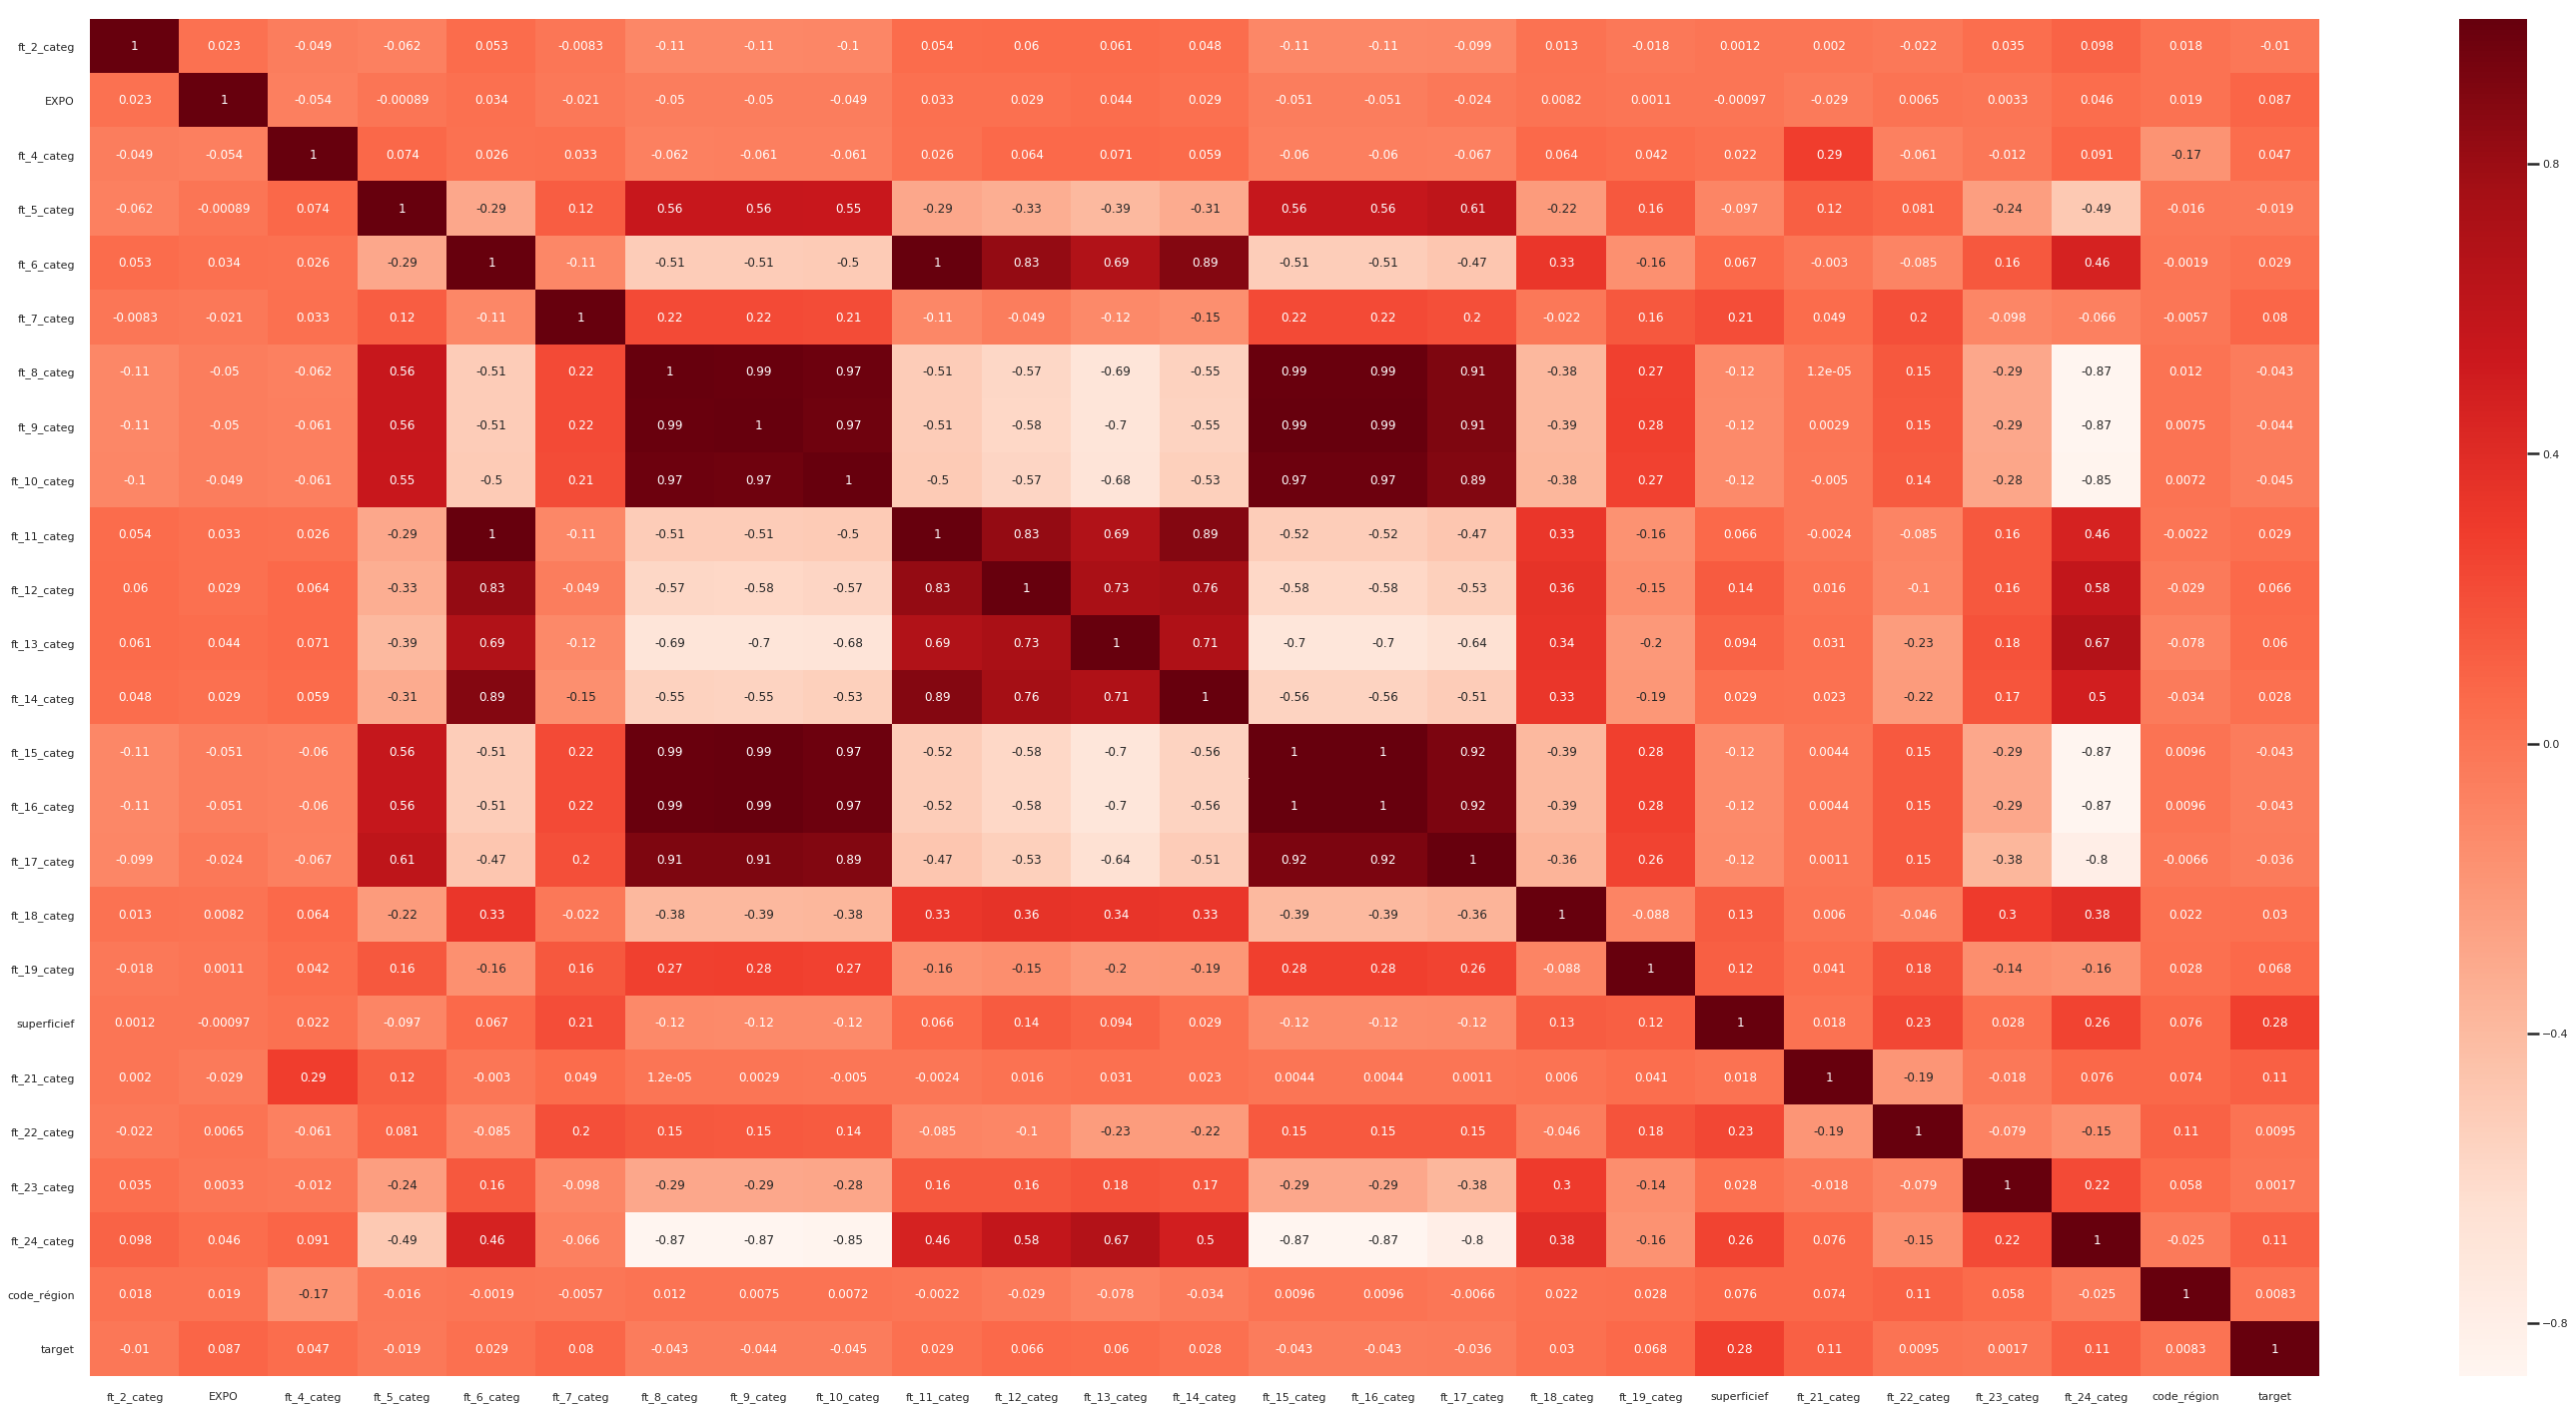

In [171]:
plt.figure(figsize=(50,25))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the heatmap, it is visible that none of the attributes are correlated with the target variable

In [172]:
target=train_data['target']
train=train_data
train.drop('target',axis=1,inplace=True)

In [173]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(train, target)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(train,target))
coef = pd.Series(reg.coef_, index = train.columns)

Best alpha using built-in LassoCV: 0.000728
Best score using built-in LassoCV: 0.104188


In [174]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 15 variables and eliminated the other 9 variables


ft_18_categ   -0.010795
ft_2_categ    -0.003996
ft_22_categ   -0.000548
code_région   -0.000174
ft_6_categ    -0.000000
ft_23_categ   -0.000000
ft_8_categ     0.000000
ft_9_categ     0.000000
ft_10_categ    0.000000
ft_11_categ   -0.000000
ft_14_categ    0.000000
ft_5_categ     0.000000
ft_16_categ    0.000000
ft_12_categ    0.003976
ft_4_categ     0.005440
ft_17_categ    0.010395
ft_13_categ    0.014887
ft_15_categ    0.026154
ft_7_categ     0.026538
ft_19_categ    0.052123
ft_24_categ    0.098741
ft_21_categ    0.119492
EXPO           0.150629
superficief    0.791330
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

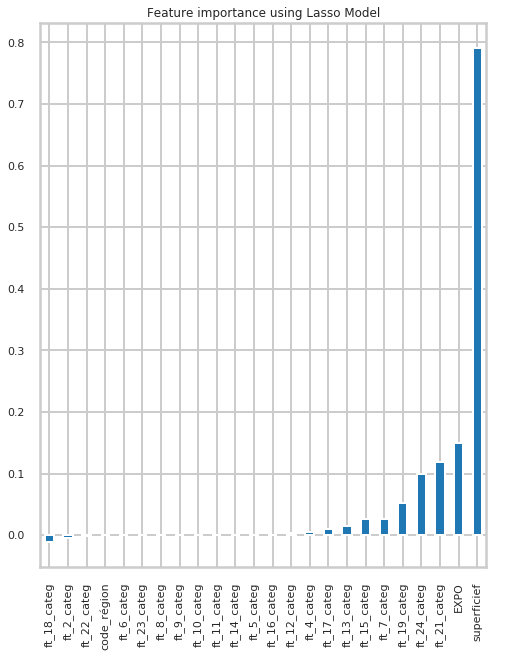

In [175]:
imp_coef = coef.sort_values()
print(imp_coef)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

In [176]:
train1=train_data[['ft_18_categ','ft_2_categ','ft_13_categ','ft_7_categ','ft_15_categ','ft_19_categ','ft_24_categ','ft_21_categ','EXPO','superficief']]
train1.head()

,ft_18_categ,ft_2_categ,ft_13_categ,ft_7_categ,ft_15_categ,ft_19_categ,ft_24_categ,ft_21_categ,EXPO,superficief
0,0.0,2014.0,0.000000,0.000000,0.0,1.0,0.2,1.000000,1.0,0.083960
2,0.0,2012.0,0.333333,0.333333,1.0,1.0,0.0,0.333333,1.0,0.032215
4,0.0,2013.0,0.000000,0.000000,0.0,1.0,0.4,0.333333,1.0,0.167181
6,0.0,2015.0,0.333333,0.333333,1.0,1.0,0.0,1.000000,0.0,0.013423
8,0.2,2014.0,0.666667,0.000000,0.0,1.0,0.4,0.333333,1.0,0.198658


### Model Implementation

In [129]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error

In [130]:
X=train_data.iloc[:,:]
Y=train_datay.iloc[:,-1]

In [131]:
#params={'objective':'binary:logistic','max_depth':6,'learning_rate':0.05,'n_estimators':200,}
#model1=XGBClassifier(**params).fit(X,Y)
model2 = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.05,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model2.fit(X,Y)
y_preds=model2.predict(test_data)
print(y_preds)

[0 0 0 ... 0 0 0]


In [132]:
#test_login=test_login.tolist()
test_login=np.array(test_login)
test_login.shape

(3412,)

In [133]:
df=pd.DataFrame({'login':test_login})
df['TARGET']=y_preds
print(df)

        login  TARGET
0     16872.0       0
1     16852.0       0
2       598.0       0
3      4516.0       0
4      7939.0       0
5     17980.0       0
6     15861.0       0
7       577.0       0
8     18087.0       0
9     12221.0       0
10     6839.0       0
11     5834.0       0
12     3896.0       0
13    12247.0       0
14    17909.0       0
15     6124.0       0
16    13178.0       0
17     9516.0       0
18     3808.0       0
19    14658.0       0
20     3073.0       0
21     7309.0       0
22      660.0       0
23     7128.0       0
24     8745.0       0
25    15290.0       0
26     7918.0       0
27    15825.0       0
28      300.0       0
29     8997.0       0
...       ...     ...
3382  17352.0       0
3383   7208.0       0
3384   5761.0       0
3385  11078.0       0
3386   4910.0       0
3387  13935.0       0
3388  14511.0       0
3389  12521.0       0
3390  15608.0       0
3391   7214.0       0
3392  14929.0       0
3393   9365.0       0
3394  16063.0       0
3395   430

In [134]:
export_csv=df.to_csv(r'/home/ubuntu/Desktop/DMA Project/y_test.csv',index=None,header=True)

In [177]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(train1, target, test_size = 0.2, random_state = 0)

In [178]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xTrain,yTrain)
y_pred=lr.predict(xTest)

In [179]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
accuracy=accuracy_score(yTest,y_pred)
print('Accuracy: %f' %accuracy)
precision=precision_score(yTest,y_pred)
print('Precision: %f' %precision)
recall=recall_score(yTest,y_pred)
print('Recall :%f' %recall)
f1=f1_score(yTest,y_pred)
print('F1 Score :%f' %f1)

Accuracy: 0.791300
Precision: 0.605505
Recall :0.146667
F1 Score :0.236136


In [229]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train,target)
y_pred=lr.predict(test_data)

In [231]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [236]:
df=pd.DataFrame({'Identifiant':test_login})
df['target']=y_pred
df

,Identifiant,target
0,16872.0,1
1,9309.0,0
2,17432.0,1
3,16852.0,1
4,16870.0,1
5,17189.0,0
6,598.0,0
7,9316.0,0
8,5780.0,1
9,12193.0,0


In [237]:
export_csv=df.to_csv(r'/home/ubuntu/Desktop/DMA Project/dataset/y_test.csv',index=True,header=True)

In [244]:
y_test=pd.merge(test_data1,df,how='outer',on='Identifiant')
y_test.drop('Index',axis=1,inplace=True)
y_test.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,16872,2012,1.000000,1,V,N,1,O,1,O,...,V,effpi,2,2682.0,2,1970.0,0,4,78383.0,1
1,16852,2012,1.000000,1,V,N,1,O,1,O,...,V,base,2,2925.0,2,1960.0,0,6,78242.0,1
2,598,2014,1.000000,1,V,V,V,V,V,V,...,N,base,2,525.0,4,1960.0,0,0,75120.0,0
3,4516,2013,0.161644,0,N,V,V,V,V,V,...,N,base,2,443.0,2,1980.0,0,0,11901.0,0
4,7939,2013,1.000000,0,N,V,V,V,V,V,...,N,base,2,1070.0,1,NaN,0,0,42330.0,0


In [245]:
export_csv=y_test.to_csv(r'/home/ubuntu/Desktop/DMA Project/dataset/Y_test.csv',index=True,header=True)

### References

https://www.datacamp.com/community/tutorials/xgboost-in-python

https://www.quora.com/What-kind-of-test-should-I-use-to-test-the-correlation-between-categorical-and-numeric-variables

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f

https://hackernoon.com/data-cleaning-3c3e37f358dc

https://www.stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/

https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa

https://hub.packtpub.com/4-ways-implement-feature-selection-python-machine-learning/

https://www.datacamp.com/community/tutorials/feature-selection-python